In [1]:
#  Import packages


from scipy.interpolate import interp1d
from scipy import integrate
from scipy.integrate import quad, dblquad
import time
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
get_ipython().run_line_magic('matplotlib', 'inline')
import datetime
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
import bisect
import copy
import json
import csv
import ast
import pylab as pl
import time
import mpmath as mp
mp.mp.dps = 15

# Import colours

c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

hitchhiker_color=c3

ios_colors=[c5, c1, c3, c7, c2, c6, c4, c9, c8]

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

color_list=list(map(to_rgb_frac, [(166,206,227),(178,223,138),(51,160,44),(31,120,180)]))

# Lists of colors for plots

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

rb_div_5=list(map(to_rgb_frac, [(202,0,32),
(244,165,130),
(247,247,247),
(146,197,222),
(5,113,176)]))

qualitative_10=list(map(to_rgb_frac, [(166,206,227),
(31,120,180),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178,214),
(106,61,154)]))

#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'


### Import data according to data format 

Run the block corresponding to the data type of the data file (data not accounting for diploidy)


type 1: $u_{ben}$ = $1 \times 10^{-6}$, $8 \times 10^{-6}$, $9 \times 10^{-6}$, $10 \times 10^{-6}$ per generation per year, age 70 

type 2: $u_{ben}$ = $2 \times 10^{-6}$, $3 \times 10^{-6}$, $4 \times 10^{-6}$, $5 \times 10^{-6}$, $6 \times 10^{-6}$, $7 \times 10^{-6}$, $20 \times 10^{-6}$ per generation per year, age 70 

type 3: $u_{ben}$ = $6 \times 10^{-6}$, $7 \times 10^{-6}$, $8 \times 10^{-6}$, $9 \times 10^{-6}$, $10 \times 10^{-6}$ per generation per year,  age 50 

type 4: $u_{ben}$ = $0.6 \times 10^{-6}$, $0.7 \times 10^{-6}$, $0.8 \times 10^{-6}$, $0.9 \times 10^{-6}$, $1 \times 10^{-6}$ per generation per year,  age 70

type 5: $u_{ben}$ = $m \times 10^{-6}$ (where m is half-integral) per generation per year,  age 70

In [2]:
# import data type 1 : for u_ben = 1, 8, 9, 10 times 10^{-6} at age 70 

major_ticks = np.log(np.array([10**-k for k in range(6)]))                                         
major_tick_labels= ["$10^{-%s}$" % k for k in range(6)]

number_of_runs=3
number_of_individuals=5000*number_of_runs
u_neu = 10**-4
u_ben = 10*10**-6
fitness = 0.1
n_bins=21
n_bins_above_phi=16
N_tau=10**5
c=1
t=70
trimmed_fmin=10**-4
trimmed_fmax=0.5
lmin=np.log(trimmed_fmin)
lmax=np.log(trimmed_fmax)

neutral_mutation=[]
neutral_mutation_hitchhiker=[]
neutral_mutation_HH_with_single_driver=[]
neutral_mutation_HH_with_two_drivers=[]
neutral_mutation_beneficial_first=[]
neutral_mutation_beneficial_later=[]
neutral_mutation_not_hitchhiker=[]

all_beneficial_mutation=[]

for n in range(number_of_runs):

    i=n+1

    vector_of_all_beneficial_mutation='beneficial_mutation_s_10_percent_70_gen_uben_10times10minus6_%s.csv' % i
    vector_of_first_beneficial_mutation='beneficial_mutation_first_mutant_s_10_percent_70_gen_uben_10times10minus6_%s.csv' % i
    vector_of_double_beneficial_mutants='beneficial_mutation_double_mutant_s_10_percent_70_gen_uben_10times10minus6_%s.csv' % i


    vector_of_neutral_mutation='neutral_mutation_s_10_percent_70_gen_uben_10times10minus6_%s.csv' % i
    vector_of_neutral_mutation_hitchhiker='neutral_mutation_hitchhiker_s_10_percent_70_gen_uben_10times10minus6_%s.csv' % i
    vector_of_neutral_mutation_beneficial_first='neutral_mutation_beneficial_first_s_10_percent_70_gen_uben_10times10minus6_%s.csv' % i
    vector_of_neutral_mutation_beneficial_later='neutral_mutation_hitchhiker_beneficial_later_s_10_percent_70_gen_uben_10times10minus6_%s.csv' % i
    vector_of_neutral_mutation_not_hitchhiker='neutral_mutation_not_hitchhiker_s_10_percent_70_gen_uben_10times10minus6_%s.csv' % i

#     vector_of_neutral_HH_with_single_driver='neutral_mutation_HH_with_single_driver_s_10_percent_70_gen_uben_8times10minus6_%s.csv' % i
#     vector_of_neutral_HH_with_two_drivers='neutral_mutation_HH_with_two_drivers_s_10_percent_70_gen_uben_8times10minus6_%s.csv' % i




    with open(vector_of_neutral_mutation) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2      # converted to 1/2 in the diploid biology world
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation.append(clone_freq)     

    with open(vector_of_neutral_mutation_hitchhiker) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_hitchhiker.append(clone_freq)     
    
#     with open(vector_of_neutral_HH_with_single_driver) as data:
#         reader = csv.reader(data,delimiter=',')
#         next(reader, None)   #skips header
#         for row in reader:
#             try:            
#                 clone_freq= float(row[1])/2
#             except: # catch the error    
#             #except IndexError: # catch the error
#                     pass # pass will basically ignore it
#              # and execution will continue on to whatever comes
#              # after the try/except block
#             #print((row[1]))
#             neutral_mutation_HH_with_single_driver.append(clone_freq)   
        
#     with open(vector_of_neutral_HH_with_two_drivers) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_HH_with_two_drivers.append(clone_freq)   

    with open(vector_of_neutral_mutation_beneficial_first) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_beneficial_first.append(clone_freq)     

    with open(vector_of_neutral_mutation_beneficial_later) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_beneficial_later.append(clone_freq)     

    with open(vector_of_neutral_mutation_not_hitchhiker) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_not_hitchhiker.append(clone_freq)     
        
    with open(vector_of_all_beneficial_mutation) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            all_beneficial_mutation.append(clone_freq)     

    
neutral_mutation=list(filter(lambda a: a != 0.0, neutral_mutation))
neutral_mutation_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_hitchhiker))
neutral_mutation_beneficial_first=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_first))
neutral_mutation_beneficial_later=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_later))
# neutral_mutation_HH_with_single_driver=list(filter(lambda a: a != 0.0, neutral_mutation_HH_with_single_driver))
# neutral_mutation_HH_with_two_drivers=list(filter(lambda a: a != 0.0, neutral_mutation_HH_with_two_drivers))
neutral_mutation_not_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_not_hitchhiker))
all_beneficial_mutation=list(filter(lambda a: a != 0.0, all_beneficial_mutation))

            
lneutral_mutation=np.log(np.array(neutral_mutation))  
lneutral_mutation_hitchhiker=np.log(np.array(neutral_mutation_hitchhiker))  
lneutral_mutation_beneficial_first=np.log(np.array(neutral_mutation_beneficial_first))
lneutral_mutation_beneficial_later=np.log(np.array(neutral_mutation_beneficial_later))  
lneutral_mutation_not_hitchhiker=np.log(np.array(neutral_mutation_not_hitchhiker)) 
    
all_data=[neutral_mutation, neutral_mutation_hitchhiker,neutral_mutation_beneficial_first,neutral_mutation_beneficial_later,\
         neutral_mutation_not_hitchhiker]
all_log_data=[lneutral_mutation, lneutral_mutation_hitchhiker,lneutral_mutation_beneficial_first,\
              lneutral_mutation_beneficial_later,lneutral_mutation_not_hitchhiker]

list_of_hitchhikers=all_data[1]
list_of_ben_neu_hitchhikers=all_data[2]
list_of_neu_ben_hitchhikers=all_data[3]
list_of_nonhitchhikers=all_data[4]
list_of_nonsynonymous=all_beneficial_mutation

# list_of_HH_with_single_driver = neutral_mutation_HH_with_single_driver

# list_of_HH_with_two_drivers = neutral_mutation_HH_with_two_drivers

# print('Before trimming HH:', len(list_of_hitchhikers), 'HH with a single driver:', len(list_of_HH_with_single_driver),\
#       'HH with 2 drivers', len(list_of_HH_with_two_drivers))




In [2]:
# import data type 2 : for u_ben range = 2, 3, 4, 5-7, 20 times 10^{-6} at age 70 

major_ticks = np.log(np.array([10**-k for k in range(6)]))                                         
major_tick_labels= ["$10^{-%s}$" % k for k in range(6)]


number_of_individuals=15000
u_neu = 10**-4
u_ben = 3*10**-6
fitness = 0.1
n_bins=21
n_bins_above_phi=16
N_tau=10**5
c=1
t=70
trimmed_fmin=10**-4
trimmed_fmax=0.4999
lmin=np.log(trimmed_fmin)
lmax=np.log(trimmed_fmax)

neutral_mutation=[]
neutral_mutation_hitchhiker=[]
neutral_mutation_beneficial_first=[]
neutral_mutation_beneficial_later=[]
neutral_mutation_HH_with_single_driver=[]
neutral_mutation_HH_with_two_drivers=[]
neutral_mutation_not_hitchhiker=[]
all_beneficial_mutation=[]



vector_of_all_beneficial_mutation='beneficial_mutation_s_10_percent_70_gen_uben_3times10minus6.csv' 
vector_of_first_beneficial_mutation='beneficial_mutation_first_mutant_s_10_percent_70_gen_uben_3times10minus6.csv' 
vector_of_double_beneficial_mutants='eneficial_mutation_double_mutant_s_10_percent_70_gen_uben_3times10minus6.csv' 
vector_of_neutral_mutation='neutral_mutation_s_10_percent_70_gen_uben_3times10minus6.csv'
vector_of_neutral_mutation_not_hitchhiker='neutral_mutation_not_hitchhiker_s_10_percent_70_gen_uben_3times10minus6.csv'
vector_of_neutral_mutation_beneficial_first='neutral_mutation_beneficial_first_s_10_percent_70_gen_uben_3times10minus6.csv' 
vector_of_neutral_mutation_beneficial_later='neutral_mutation_hitchhiker_beneficial_later_s_10_percent_70_gen_uben_3times10minus6.csv' 
vector_of_neutral_mutation_hitchhiker='neutral_mutation_hitchhiker_s_10_percent_70_gen_uben_3times10minus6.csv' 


with open(vector_of_neutral_mutation) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2      # converted to 1/2 in the diploid biology world
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation.append(clone_freq)     

with open(vector_of_neutral_mutation_hitchhiker) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_hitchhiker.append(clone_freq)     

# with open(vector_of_neutral_HH_with_single_driver) as data:
#     reader = csv.reader(data,delimiter=',')
#     next(reader, None)   #skips header
#     for row in reader:
#         try:            
#             clone_freq= float(row[1])/2
#         except: # catch the error    
#         #except IndexError: # catch the error
#                 pass # pass will basically ignore it
#          # and execution will continue on to whatever comes
#          # after the try/except block
#         #print((row[1]))
#         neutral_mutation_HH_with_single_driver.append(clone_freq)   
        
# with open(vector_of_neutral_HH_with_two_drivers) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_HH_with_two_drivers.append(clone_freq)   
        
with open(vector_of_neutral_mutation_beneficial_first) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_beneficial_first.append(clone_freq)     

with open(vector_of_neutral_mutation_beneficial_later) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_beneficial_later.append(clone_freq)     

with open(vector_of_neutral_mutation_not_hitchhiker) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_not_hitchhiker.append(clone_freq)     
        
with open(vector_of_all_beneficial_mutation) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        all_beneficial_mutation.append(clone_freq)     
        
    
neutral_mutation=list(filter(lambda a: a != 0.0, neutral_mutation))
neutral_mutation_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_hitchhiker))
neutral_mutation_beneficial_first=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_first))
neutral_mutation_beneficial_later=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_later))
neutral_mutation_not_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_not_hitchhiker))
all_beneficial_mutation=list(filter(lambda a: a != 0.0, all_beneficial_mutation))

            
lneutral_mutation=np.log(np.array(neutral_mutation))  
lneutral_mutation_hitchhiker=np.log(np.array(neutral_mutation_hitchhiker))  
lneutral_mutation_beneficial_first=np.log(np.array(neutral_mutation_beneficial_first))
lneutral_mutation_beneficial_later=np.log(np.array(neutral_mutation_beneficial_later))  
lneutral_mutation_not_hitchhiker=np.log(np.array(neutral_mutation_not_hitchhiker)) 
    
all_data=[neutral_mutation, neutral_mutation_hitchhiker,neutral_mutation_beneficial_first,neutral_mutation_beneficial_later,\
         neutral_mutation_not_hitchhiker]
all_log_data=[lneutral_mutation, lneutral_mutation_hitchhiker,lneutral_mutation_beneficial_first,\
              lneutral_mutation_beneficial_later,lneutral_mutation_not_hitchhiker]

list_of_hitchhikers=all_data[1]
list_of_ben_neu_hitchhikers=all_data[2]
list_of_neu_ben_hitchhikers=all_data[3]
list_of_nonhitchhikers=all_data[4]
list_of_nonsynonymous=all_beneficial_mutation



In [2]:
# import data type 3 : for u_ben 6-10 times 10^{-6} at age 50 

major_ticks = np.log(np.array([10**-k for k in range(6)]))                                         
major_tick_labels= ["$10^{-%s}$" % k for k in range(6)]

number_of_runs=3
number_of_individuals=5000*number_of_runs
u_neu = 10**-4
u_ben = 6*10**-6
fitness = 0.1
n_bins=21
n_bins_above_phi=16
N_tau=10**5
c=1
t=50
trimmed_fmin=10**-4
trimmed_fmax=0.5
lmin=np.log(trimmed_fmin)
lmax=np.log(trimmed_fmax)

neutral_mutation=[]
neutral_mutation_hitchhiker=[]
neutral_mutation_HH_with_single_driver=[]
neutral_mutation_HH_with_two_drivers=[]
neutral_mutation_beneficial_first=[]
neutral_mutation_beneficial_later=[]
neutral_mutation_not_hitchhiker=[]

all_beneficial_mutation=[]

for n in range(number_of_runs):

    i=n+1

    vector_of_all_beneficial_mutation='age 50 simulations/beneficial_mutation_s_10_percent_50_gen_uben_6times10minus6_%s.csv' % i
    vector_of_first_beneficial_mutation='age 50 simulations/beneficial_mutation_first_mutant_s_10_percent_50_gen_uben_6times10minus6_%s.csv' % i
    vector_of_double_beneficial_mutants='age 50 simulations/beneficial_mutation_double_mutant_s_10_percent_50_gen_uben_6times10minus6_%s.csv' % i


    vector_of_neutral_mutation='age 50 simulations/neutral_mutation_s_10_percent_50_gen_uben_6times10minus6_%s.csv' % i
    vector_of_neutral_mutation_hitchhiker='age 50 simulations/neutral_mutation_hitchhiker_s_10_percent_50_gen_uben_6times10minus6_%s.csv' % i
    vector_of_neutral_mutation_beneficial_first='age 50 simulations/neutral_mutation_beneficial_first_s_10_percent_50_gen_uben_6times10minus6_%s.csv' % i
    vector_of_neutral_mutation_beneficial_later='age 50 simulations/neutral_mutation_hitchhiker_beneficial_later_s_10_percent_50_gen_uben_6times10minus6_%s.csv' % i
    vector_of_neutral_mutation_not_hitchhiker='age 50 simulations/neutral_mutation_not_hitchhiker_s_10_percent_50_gen_uben_6times10minus6_%s.csv' % i

#     vector_of_neutral_HH_with_single_driver='neutral_mutation_HH_with_single_driver_s_10_percent_70_gen_uben_8times10minus6_%s.csv' % i
#     vector_of_neutral_HH_with_two_drivers='neutral_mutation_HH_with_two_drivers_s_10_percent_70_gen_uben_8times10minus6_%s.csv' % i




    with open(vector_of_neutral_mutation) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2      # converted to 1/2 in the diploid biology world
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation.append(clone_freq)     

    with open(vector_of_neutral_mutation_hitchhiker) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_hitchhiker.append(clone_freq)     
    
#     with open(vector_of_neutral_HH_with_single_driver) as data:
#         reader = csv.reader(data,delimiter=',')
#         next(reader, None)   #skips header
#         for row in reader:
#             try:            
#                 clone_freq= float(row[1])/2
#             except: # catch the error    
#             #except IndexError: # catch the error
#                     pass # pass will basically ignore it
#              # and execution will continue on to whatever comes
#              # after the try/except block
#             #print((row[1]))
#             neutral_mutation_HH_with_single_driver.append(clone_freq)   
        
#     with open(vector_of_neutral_HH_with_two_drivers) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_HH_with_two_drivers.append(clone_freq)   

    with open(vector_of_neutral_mutation_beneficial_first) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_beneficial_first.append(clone_freq)     

    with open(vector_of_neutral_mutation_beneficial_later) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_beneficial_later.append(clone_freq)     

    with open(vector_of_neutral_mutation_not_hitchhiker) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_not_hitchhiker.append(clone_freq)     
        
    with open(vector_of_all_beneficial_mutation) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            all_beneficial_mutation.append(clone_freq)     

    
neutral_mutation=list(filter(lambda a: a != 0.0, neutral_mutation))
neutral_mutation_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_hitchhiker))
neutral_mutation_beneficial_first=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_first))
neutral_mutation_beneficial_later=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_later))
# neutral_mutation_HH_with_single_driver=list(filter(lambda a: a != 0.0, neutral_mutation_HH_with_single_driver))
# neutral_mutation_HH_with_two_drivers=list(filter(lambda a: a != 0.0, neutral_mutation_HH_with_two_drivers))
neutral_mutation_not_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_not_hitchhiker))
all_beneficial_mutation=list(filter(lambda a: a != 0.0, all_beneficial_mutation))

            
lneutral_mutation=np.log(np.array(neutral_mutation))  
lneutral_mutation_hitchhiker=np.log(np.array(neutral_mutation_hitchhiker))  
lneutral_mutation_beneficial_first=np.log(np.array(neutral_mutation_beneficial_first))
lneutral_mutation_beneficial_later=np.log(np.array(neutral_mutation_beneficial_later))  
lneutral_mutation_not_hitchhiker=np.log(np.array(neutral_mutation_not_hitchhiker)) 
    
all_data=[neutral_mutation, neutral_mutation_hitchhiker,neutral_mutation_beneficial_first,neutral_mutation_beneficial_later,\
         neutral_mutation_not_hitchhiker]
all_log_data=[lneutral_mutation, lneutral_mutation_hitchhiker,lneutral_mutation_beneficial_first,\
              lneutral_mutation_beneficial_later,lneutral_mutation_not_hitchhiker]

list_of_hitchhikers=all_data[1]
list_of_ben_neu_hitchhikers=all_data[2]
list_of_neu_ben_hitchhikers=all_data[3]
list_of_nonhitchhikers=all_data[4]
list_of_nonsynonymous=all_beneficial_mutation

# list_of_HH_with_single_driver = neutral_mutation_HH_with_single_driver

# list_of_HH_with_two_drivers = neutral_mutation_HH_with_two_drivers

# print('Before trimming HH:', len(list_of_hitchhikers), 'HH with a single driver:', len(list_of_HH_with_single_driver),\
#       'HH with 2 drivers', len(list_of_HH_with_two_drivers))




In [2]:
# import data type 4 : for u_ben 0.6-1 times 10^{-6} at age 70 

major_ticks = np.log(np.array([10**-k for k in range(6)]))                                         
major_tick_labels= ["$10^{-%s}$" % k for k in range(6)]

number_of_runs=1
number_of_individuals=15000*number_of_runs
u_neu = 10**-4
u_ben = 7*10**-7
fitness = 0.1
n_bins=21
n_bins_above_phi=16
N_tau=10**5
c=1
t=70
trimmed_fmin=10**-4
trimmed_fmax=0.5
lmin=np.log(trimmed_fmin)
lmax=np.log(trimmed_fmax)

neutral_mutation=[]
neutral_mutation_hitchhiker=[]
neutral_mutation_HH_with_single_driver=[]
neutral_mutation_HH_with_two_drivers=[]
neutral_mutation_beneficial_first=[]
neutral_mutation_beneficial_later=[]
neutral_mutation_not_hitchhiker=[]

all_beneficial_mutation=[]

for n in range(number_of_runs):

    i=n+1

    vector_of_all_beneficial_mutation='uben 10minus7 simulations/beneficial_mutation_s_10_percent_70_gen_uben_7times10minus7_15000runs_%s.csv' % i
    vector_of_first_beneficial_mutation='uben 10minus7 simulations/beneficial_mutation_first_mutant_s_10_percent_70_gen_uben_7times10minus7_15000runs_%s.csv' % i
    vector_of_double_beneficial_mutants='uben 10minus7 simulationsbeneficial_mutation_double_mutant_s_10_percent_70_gen_uben_7times10minus7_15000runs_%s.csv' % i


    vector_of_neutral_mutation='uben 10minus7 simulations/neutral_mutation_s_10_percent_70_gen_uben_7times10minus7_15000runs_%s.csv' % i
    vector_of_neutral_mutation_hitchhiker='uben 10minus7 simulations/neutral_mutation_hitchhiker_s_10_percent_70_gen_uben_7times10minus7_15000runs_%s.csv' % i
    vector_of_neutral_mutation_beneficial_first='uben 10minus7 simulations/neutral_mutation_beneficial_first_s_10_percent_70_gen_uben_7times10minus7_15000runs_%s.csv' % i
    vector_of_neutral_mutation_beneficial_later='uben 10minus7 simulations/neutral_mutation_hitchhiker_beneficial_later_s_10_percent_70_gen_uben_7times10minus7_15000runs_%s.csv' % i
    vector_of_neutral_mutation_not_hitchhiker='uben 10minus7 simulations/neutral_mutation_not_hitchhiker_s_10_percent_70_gen_uben_7times10minus7_15000runs_%s.csv' % i

#     vector_of_neutral_HH_with_single_driver='neutral_mutation_HH_with_single_driver_s_10_percent_70_gen_uben_8times10minus6_%s.csv' % i
#     vector_of_neutral_HH_with_two_drivers='neutral_mutation_HH_with_two_drivers_s_10_percent_70_gen_uben_8times10minus6_%s.csv' % i




    with open(vector_of_neutral_mutation) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2      # converted to 1/2 in the diploid biology world
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation.append(clone_freq)     

    with open(vector_of_neutral_mutation_hitchhiker) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_hitchhiker.append(clone_freq)     
    
#     with open(vector_of_neutral_HH_with_single_driver) as data:
#         reader = csv.reader(data,delimiter=',')
#         next(reader, None)   #skips header
#         for row in reader:
#             try:            
#                 clone_freq= float(row[1])/2
#             except: # catch the error    
#             #except IndexError: # catch the error
#                     pass # pass will basically ignore it
#              # and execution will continue on to whatever comes
#              # after the try/except block
#             #print((row[1]))
#             neutral_mutation_HH_with_single_driver.append(clone_freq)   
        
#     with open(vector_of_neutral_HH_with_two_drivers) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_HH_with_two_drivers.append(clone_freq)   

    with open(vector_of_neutral_mutation_beneficial_first) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_beneficial_first.append(clone_freq)     

    with open(vector_of_neutral_mutation_beneficial_later) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_beneficial_later.append(clone_freq)     

    with open(vector_of_neutral_mutation_not_hitchhiker) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_not_hitchhiker.append(clone_freq)     
        
    with open(vector_of_all_beneficial_mutation) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])/2
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            all_beneficial_mutation.append(clone_freq)     

    
neutral_mutation=list(filter(lambda a: a != 0.0, neutral_mutation))
neutral_mutation_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_hitchhiker))
neutral_mutation_beneficial_first=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_first))
neutral_mutation_beneficial_later=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_later))
# neutral_mutation_HH_with_single_driver=list(filter(lambda a: a != 0.0, neutral_mutation_HH_with_single_driver))
# neutral_mutation_HH_with_two_drivers=list(filter(lambda a: a != 0.0, neutral_mutation_HH_with_two_drivers))
neutral_mutation_not_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_not_hitchhiker))
all_beneficial_mutation=list(filter(lambda a: a != 0.0, all_beneficial_mutation))

            
lneutral_mutation=np.log(np.array(neutral_mutation))  
lneutral_mutation_hitchhiker=np.log(np.array(neutral_mutation_hitchhiker))  
lneutral_mutation_beneficial_first=np.log(np.array(neutral_mutation_beneficial_first))
lneutral_mutation_beneficial_later=np.log(np.array(neutral_mutation_beneficial_later))  
lneutral_mutation_not_hitchhiker=np.log(np.array(neutral_mutation_not_hitchhiker)) 
    
all_data=[neutral_mutation, neutral_mutation_hitchhiker,neutral_mutation_beneficial_first,neutral_mutation_beneficial_later,\
         neutral_mutation_not_hitchhiker]
all_log_data=[lneutral_mutation, lneutral_mutation_hitchhiker,lneutral_mutation_beneficial_first,\
              lneutral_mutation_beneficial_later,lneutral_mutation_not_hitchhiker]

list_of_hitchhikers=all_data[1]
list_of_ben_neu_hitchhikers=all_data[2]
list_of_neu_ben_hitchhikers=all_data[3]
list_of_nonhitchhikers=all_data[4]
list_of_nonsynonymous=all_beneficial_mutation

# list_of_HH_with_single_driver = neutral_mutation_HH_with_single_driver

# list_of_HH_with_two_drivers = neutral_mutation_HH_with_two_drivers

# print('Before trimming HH:', len(list_of_hitchhikers), 'HH with a single driver:', len(list_of_HH_with_single_driver),\
#       'HH with 2 drivers', len(list_of_HH_with_two_drivers))




In [2]:
# import data type 5 : for u_ben that are m times 10^{-6} at age 70 where m is a half-integer

major_ticks = np.log(np.array([10**-k for k in range(6)]))                                         
major_tick_labels= ["$10^{-%s}$" % k for k in range(6)]


number_of_individuals=15000
u_neu = 10**-4
u_ben = 9.5*10**-6
fitness = 0.1
n_bins=21
n_bins_above_phi=16
N_tau=10**5
c=1
t=70
trimmed_fmin=10**-4
trimmed_fmax=0.5
lmin=np.log(trimmed_fmin)
lmax=np.log(trimmed_fmax)

neutral_mutation=[]
neutral_mutation_hitchhiker=[]
neutral_mutation_beneficial_first=[]
neutral_mutation_beneficial_later=[]
neutral_mutation_HH_with_single_driver=[]
neutral_mutation_HH_with_two_drivers=[]
neutral_mutation_not_hitchhiker=[]

all_beneficial_mutation=[]



vector_of_all_beneficial_mutation='uben 10minus6 half integer simulations/beneficial_mutation_s_10_percent_70_gen_uben_9halftimes10minus6.csv' 
vector_of_first_beneficial_mutation='uben 10minus6 half integer simulations/beneficial_mutation_first_mutant_s_10_percent_70_gen_9halftimes10minus6.csv' 
vector_of_double_beneficial_mutants='uben 10minus6 half integer simulations/beneficial_mutation_double_mutant_s_10_percent_70_gen_9halftimes10minus6.csv' 


vector_of_neutral_mutation='uben 10minus6 half integer simulations/neutral_mutation_s_10_percent_70_gen_uben_9halftimes10minus6.csv'
vector_of_neutral_mutation_not_hitchhiker='uben 10minus6 half integer simulations/neutral_mutation_not_hitchhiker_s_10_percent_70_gen_uben_9halftimes10minus6.csv'
vector_of_neutral_mutation_beneficial_first='uben 10minus6 half integer simulations/neutral_mutation_beneficial_first_s_10_percent_70_gen_uben_9halftimes10minus6.csv' 
vector_of_neutral_mutation_beneficial_later='uben 10minus6 half integer simulations/neutral_mutation_hitchhiker_beneficial_later_s_10_percent_70_gen_uben_9halftimes10minus6.csv' 
vector_of_neutral_mutation_hitchhiker='uben 10minus6 half integer simulations/neutral_mutation_hitchhiker_s_10_percent_70_gen_uben_9halftimes10minus6.csv' 

# vector_of_neutral_HH_with_single_driver='data with HH driver no/neutral_mutation_HH_with_single_driver_s_10_percent_70_gen_uben_7times10minus6.csv'
# vector_of_neutral_HH_with_two_drivers='data with HH driver no/neutral_mutation_HH_with_two_drivers_s_10_percent_70_gen_uben_7times10minus6.csv'


with open(vector_of_neutral_mutation) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2      # converted to 1/2 in the diploid biology world
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation.append(clone_freq)     

with open(vector_of_neutral_mutation_hitchhiker) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_hitchhiker.append(clone_freq)     

# with open(vector_of_neutral_HH_with_single_driver) as data:
#     reader = csv.reader(data,delimiter=',')
#     next(reader, None)   #skips header
#     for row in reader:
#         try:            
#             clone_freq= float(row[1])/2
#         except: # catch the error    
#         #except IndexError: # catch the error
#                 pass # pass will basically ignore it
#          # and execution will continue on to whatever comes
#          # after the try/except block
#         #print((row[1]))
#         neutral_mutation_HH_with_single_driver.append(clone_freq)   
        
# with open(vector_of_neutral_HH_with_two_drivers) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_HH_with_two_drivers.append(clone_freq)   
        
with open(vector_of_neutral_mutation_beneficial_first) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_beneficial_first.append(clone_freq)     

with open(vector_of_neutral_mutation_beneficial_later) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_beneficial_later.append(clone_freq)     

with open(vector_of_neutral_mutation_not_hitchhiker) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_not_hitchhiker.append(clone_freq)     
        
with open(vector_of_all_beneficial_mutation) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        all_beneficial_mutation.append(clone_freq)     
        
    
neutral_mutation=list(filter(lambda a: a != 0.0, neutral_mutation))
neutral_mutation_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_hitchhiker))
neutral_mutation_beneficial_first=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_first))
neutral_mutation_beneficial_later=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_later))
# neutral_mutation_HH_with_single_driver=list(filter(lambda a: a != 0.0, neutral_mutation_HH_with_single_driver))
# neutral_mutation_HH_with_two_drivers=list(filter(lambda a: a != 0.0, neutral_mutation_HH_with_two_drivers))
neutral_mutation_not_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_not_hitchhiker))
all_beneficial_mutation=list(filter(lambda a: a != 0.0, all_beneficial_mutation))

            
lneutral_mutation=np.log(np.array(neutral_mutation))  
lneutral_mutation_hitchhiker=np.log(np.array(neutral_mutation_hitchhiker))  
lneutral_mutation_beneficial_first=np.log(np.array(neutral_mutation_beneficial_first))
lneutral_mutation_beneficial_later=np.log(np.array(neutral_mutation_beneficial_later))  
lneutral_mutation_not_hitchhiker=np.log(np.array(neutral_mutation_not_hitchhiker)) 
    
all_data=[neutral_mutation, neutral_mutation_hitchhiker,neutral_mutation_beneficial_first,neutral_mutation_beneficial_later,\
         neutral_mutation_not_hitchhiker]
all_log_data=[lneutral_mutation, lneutral_mutation_hitchhiker,lneutral_mutation_beneficial_first,\
              lneutral_mutation_beneficial_later,lneutral_mutation_not_hitchhiker]

list_of_hitchhikers=all_data[1]
list_of_ben_neu_hitchhikers=all_data[2]
list_of_neu_ben_hitchhikers=all_data[3]
list_of_nonhitchhikers=all_data[4]
list_of_nonsynonymous=all_beneficial_mutation

# list_of_HH_with_single_driver = neutral_mutation_HH_with_single_driver

# list_of_HH_with_two_drivers = neutral_mutation_HH_with_two_drivers

# print('Before trimming HH:', len(list_of_hitchhikers), 'HH with a single driver:', len(list_of_HH_with_single_driver))

### Import functions   

In [3]:
# define plotting functions

def error_bars(hist, normed_value, widths):
    
    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
#         print('normalised_hist is of type', type(normalised_hist))
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]
    
    return err

def SD_of_mean(hist, normed_value, widths):
    
    list_SD = []
     
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        list_SD.append(sqrt_hist)
        
        return list_SD
    
# for plotting synonymous VAF
def plot_log_hist_data_for_plot_rescaled_simulation(study_VAFs, study_total, u_syn, n_bins, lmin, lmax, study_name, marker_name, marker_size, color, scale, layer):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total*u_syn
    hist, bins = np.histogram(log_VAFs, bins=n_bins, range=(lmin, lmax))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
 

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
    print('hist without zero is', hist_without_zero)
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)
    
#     scale=1.2
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 15*1.2
    m_width = 1.5*1.2
    c_size = 7*1.2
    c_thick = 3*1.2
    e_width = 1.5*1.2

  

    
    #Plot
#     ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = 'grey', barsabove=True,\
#              elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
#              markeredgecolor = color, markerfacecolor = color, label = study_name, zorder=3)
    
    ax1.errorbar(bin_centres_without_zero, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=layer)
    print('log_hist_for_plot is', log_hist_for_plot)
    print('errors is', errors)
    
    # Set axis limits
    ax1.set_ylim(min(log_hist_for_plot), max(log_hist_for_plot))
#     ax1.set_ylim(10**0.5, max(log_hist_for_plot))
    ax1.set_xlim(np.log(10**-4), np.log(0.5))
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')

    x_major_ticks =  [
#         np.log(0.00001), np.log(0.00002),np.log(0.00003),np.log(0.00004),np.log(0.00005),
#                       np.log(0.00006),np.log(0.00007),np.log(0.00008),np.log(0.00009),\
                      np.log(0.0001), np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008),np.log(0.0009),\
                      np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5)]
#     [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                    
    x_major_tick_labels =  [
#         "","","","",\
                            "0.01","","","","","","","","",\
                            "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50"]
#     ["0.01","","","","","","","","",\
                         
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [\
#         np.log(0.1), np.log(0.2), np.log(0.3),\
#                      np.log(0.4), np.log(0.5), np.log(0.6), \
#                      np.log(0.7), np.log(0.8), np.log(0.9),\
                     np.log(1), np.log(2), np.log(3),\
                     np.log(4), 
                     np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9),\
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), 
                     np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000)]
    y_major_ticks = [c-np.log(10**0) for c in y_major_ticks]
    y_major_tick_labels = [
        "" ,"", "", "", "", "", "", "", "",  "$10^{1}$",\
#                            "","", "", "",
#         "", "", "", "", "", "$10^{1}$",
        "", "", "", "", "",
        "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", "$10^{4}$",\
                          "", "", "", "", "", "", "", "", "$10^{5}$","", "", "", "", "", "", "", "", "$10^{6}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
# #     #set panel legends
#     legend_marker_size = 8*scale
#     legend_elements = [Line2D([0], [0], marker = Razavimarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.2, \
#                               lw=0, label='Razavi 2019'),
#                       Line2D([0], [0], marker = Acunamarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.3, \
#                               lw=0, label='Acuna-Hidalgo 2017'),
#                       Line2D([0], [0], marker = Youngmarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.2, \
#                               lw=0, label='Young 2016 & 2019'),
#                       ]

#     ax1.legend(ncol=1, handles=legend_elements, loc='center', bbox_to_anchor=(0.8, 0.8), frameon=0, fontsize = 16*scale)
    
    return ax1  

def plot_log_hist_data_for_plot_rescaled_simulation_2(study_VAFs, study_total, u_syn, n_bins, lmin, lmax, study_name, marker_name, marker_size, color, scale, layer):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total*u_syn
    hist, bins = np.histogram(log_VAFs, bins=n_bins, range=(lmin, lmax))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
 

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
    print('hist without zero is', hist_without_zero)
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)
    
#     scale=1.2
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 15*1.2
    m_width = 1.5*1.2
    c_size = 7*1.2
    c_thick = 3*1.2
    e_width = 1.5*1.2

  

    
    #Plot
#     ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = 'grey', barsabove=True,\
#              elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
#              markeredgecolor = color, markerfacecolor = color, label = study_name, zorder=3)
    
    ax1.errorbar(bin_centres_without_zero, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=layer)
    print('log_hist_for_plot is', log_hist_for_plot)
    print('errors is', errors)
    
    # Set axis limits
    ax1.set_ylim(min(log_hist_for_plot), max(log_hist_for_plot))
#     ax1.set_ylim(10**0.5, max(log_hist_for_plot))
    ax1.set_xlim(np.log(10**-4), np.log(0.5))
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')

    x_major_ticks =  [
#         np.log(0.00001), np.log(0.00002),np.log(0.00003),np.log(0.00004),np.log(0.00005),
#                       np.log(0.00006),np.log(0.00007),np.log(0.00008),np.log(0.00009),\
                      np.log(0.0001), np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008),np.log(0.0009),\
                      np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5)]
#     [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                    
    x_major_tick_labels =  [
#         "","","","",\
                            "0.01","","","","","","","","",\
                            "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50"]
#     ["0.01","","","","","","","","",\
                         
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [\
        np.log(0.1), np.log(0.2), np.log(0.3),\
                     np.log(0.4), np.log(0.5), np.log(0.6), \
                     np.log(0.7), np.log(0.8), np.log(0.9),\
                     np.log(1), np.log(2), np.log(3),\
                     np.log(4), 
                     np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9),\
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), 
                     np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000)]
    y_major_ticks = [c-np.log(10**0) for c in y_major_ticks]
    y_major_tick_labels = [
        "" ,"", "", "", "", "", "", "", "",  "$10^{0}$",\
                           "","", "", "",
        "", "", "", "", "", "$10^{1}$",
        "", "", "", "", "",
        "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", "$10^{4}$",\
                          "", "", "", "", "", "", "", "", "$10^{5}$","", "", "", "", "", "", "", "", "$10^{6}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
# #     #set panel legends
#     legend_marker_size = 8*scale
#     legend_elements = [Line2D([0], [0], marker = Razavimarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.2, \
#                               lw=0, label='Razavi 2019'),
#                       Line2D([0], [0], marker = Acunamarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.3, \
#                               lw=0, label='Acuna-Hidalgo 2017'),
#                       Line2D([0], [0], marker = Youngmarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.2, \
#                               lw=0, label='Young 2016 & 2019'),
#                       ]

#     ax1.legend(ncol=1, handles=legend_elements, loc='center', bbox_to_anchor=(0.8, 0.8), frameon=0, fontsize = 16*scale)
    
    return ax1  

# for plotting nonsynonymous VAF
def plot_log_hist_data_for_plot_simulation(study_VAFs, study_total, n_bins, lmin, lmax, study_name, marker_name, marker_size, color, scale, layer):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=n_bins, range=(lmin, lmax))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
 

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
    print('hist without zero is', hist_without_zero)
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)
    
#     scale=1.2
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 15*1.2
    m_width = 1.5*1.2
    c_size = 7*1.2
    c_thick = 3*1.2
    e_width = 1.5*1.2


    ax1.errorbar(bin_centres_without_zero, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = color, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = color, markerfacecolor = color, label = study_name, zorder=layer)
    print('log_hist_for_plot is', log_hist_for_plot)
    print('errors is', errors)
    
    # Set axis limits
    ax1.set_ylim(min(log_hist_for_plot), max(log_hist_for_plot))
#     ax1.set_ylim(10**0.5, max(log_hist_for_plot))
    ax1.set_xlim(np.log(10**-4), np.log(0.5))
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')

    x_major_ticks =  [
#         np.log(0.00001), np.log(0.00002),np.log(0.00003),np.log(0.00004),np.log(0.00005),
#                       np.log(0.00006),np.log(0.00007),np.log(0.00008),np.log(0.00009),\
                      np.log(0.0001), np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008),np.log(0.0009),\
                      np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5)]
#     [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                    
    x_major_tick_labels =  [
#         "","","","",\
                            "0.01","","","","","","","","",\
                            "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50"]
#     ["0.01","","","","","","","","",\
                         
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [
#         np.log(0.1), np.log(0.2), np.log(0.3),\
#                      np.log(0.4), np.log(0.5), np.log(0.6), \
#                      np.log(0.7), np.log(0.8), np.log(0.9),\
                     np.log(1), np.log(2), np.log(3),\
                     np.log(4), 
                     np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9),\
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), 
                     np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000)]
    y_major_ticks = [c-np.log(10**5) for c in y_major_ticks]
    y_major_tick_labels = [
#         "" ,"", "", "", "", "", "", "", "", \
                           "","", "", "",
        "", "", "", "", "", "$10^{-4}$",
        "", "", "", "", "",
        "", "", "", \
                           "$10^{-3}$","", "", "", "", "", "", "", "", "$10^{2}$","", "", "", "", "", "", "", "", "$10^{-1}$",\
                          "", "", "", "", "", "", "", "", "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
# #     #set panel legends
#     legend_marker_size = 8*scale
#     legend_elements = [Line2D([0], [0], marker = Razavimarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.2, \
#                               lw=0, label='Razavi 2019'),
#                       Line2D([0], [0], marker = Acunamarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.3, \
#                               lw=0, label='Acuna-Hidalgo 2017'),
#                       Line2D([0], [0], marker = Youngmarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.2, \
#                               lw=0, label='Young 2016 & 2019'),
#                       ]

#     ax1.legend(ncol=1, handles=legend_elements, loc='center', bbox_to_anchor=(0.8, 0.8), frameon=0, fontsize = 16*scale)
    
    return ax1  


In [4]:
# define theory functions 

from scipy import integrate
from scipy.integrate import quad, dblquad
import scipy.special as sc
import math

     
def Predicted_neutral_VAF_log(l, N_tau, c, t): 
    return N_tau*np.exp(-2*N_tau*np.exp(l)/(c*t))

def Predicted_drift_with_cutoff(l, N_tau, c, t):
    return N_tau*np.exp(-2*N_tau/(c*t)*(np.exp(l)/(1-2*np.exp(l))))

def log_Predicted_neutral_VAF_log(l, N_tau, c, t): 
    return np.log(N_tau*np.exp(-2*N_tau*np.exp(l)/(c*t)))

def Predicted_beneficial_with_cutoff(l, N_tau, u_ben, s, t):
    return N_tau*u_ben*np.exp(-2*N_tau/((np.exp(s*t)-1)/s)*(np.exp(l)/(1-2*np.exp(l))))

In [6]:
# HH prediction 

def hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s):
    N = N_tau

    expected_density=np.exp(l)*(2*N/(1-2*np.exp(l))**2)*N_tau*u_driver/s**2/(2*N*np.exp(l)/(1-2*np.exp(l)))**2*( \
                                                                                  np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*np.exp(-s*t))*np.exp(s*t)        -\
                                     np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s)*(np.exp(s*t)+ (2*N*np.exp(l)/(1-2*np.exp(l)))*s*(np.exp(s*t)-1)  ))

    return expected_density

def minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s):
    N=N_tau
    tau=1
    expected_density=np.exp(l)*N*tau*u_driver/(np.exp(l)*s*(1-2*np.exp(l)))*(-s*t*np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau)+sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau) -\
                                                   sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau*np.exp(-s*t)))
    

    return expected_density

def hitchhikers_reed_model_1(l, N_tau, t, u_driver, s):
    
    relative_fitness=0.05
    
    psi = np.log((s/relative_fitness-1)*N_tau*s+1)/s

    if t>psi:
        density1 = hitchhikers_alternative_theory_with_cutoff(l, N_tau, psi, u_driver, s)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, psi, u_driver, s)
        density2 = 0
        density = density1 + density2
    else:
        density = hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s)
    
    return density


In [8]:

def squared_distance_calculation_nonsyn_cumulative_weightedbyerror_with_cutoff(params, data, study_total, c, t, N_tau, lmin, lmax, n_bins): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    # fits for diploid u_driver becos this is simulation
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    u_driver = params[0]
    
    s = params[1]
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        logfreq = datapoint[0] 

        data_density = datapoint[1]
        
        num_data = datapoint[4]
        
        cumulative_num_data = cumulative_num_data + num_data
        
        predicted_density=integrate.quad(lambda l: (Predicted_beneficial_with_cutoff(l, N_tau, u_driver, s, t)\
                                                    )/bin_size,\
                                     logfreq-bin_size/2, logfreq+bin_size/2)[0]
        
        predicted_cumulative_density = predicted_cumulative_density + predicted_density

        
        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

#             upper_sigma_log = datapoint[3] 
#             lower_sigma_log = datapoint[2] 
#             sigma=(upper_sigma_log-lower_sigma_log)
            SD = math.sqrt(cumulative_num_data)/(bin_size*normed_value)
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)
#             print('sigma_cumulative', sigma_cumulative)

            total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error


#             total_square_distance = total_square_distance + square_distance/sigma**2  # weighted by error
#             total_square_distance = total_square_distance + square_distance  # not weighted by error
        else:
            pass
#             print('data density is zero')
     
    return total_square_distance



In [9]:
# creating lists for fitting and plotting

# synonymous variants
def rescaled_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, u_syn, n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total*u_syn
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)
        
    VAF_densities=[]
    lower_error = []
    upper_error = []

    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)

    print('lower error:', lower_error)
    print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres_without_zero, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

def rescaled_cumulative_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, u_syn, n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total*u_syn
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)

        
    VAF_densities=[]
    lower_error = []
    upper_error = []

    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)

    print('lower error:', lower_error)
    print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

# nonsynonymous variants
def VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)

        
    VAF_densities=[]
    lower_error = []
    upper_error = []

    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)
        
    print('lower error:', lower_error)
    print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres_without_zero, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

def cumulative_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
        
    VAF_densities=[]
    lower_error = []
    upper_error = []

    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)

    print('lower error:', lower_error)
    print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

# All beneficial mutations

In [11]:
# trim data 

trimmed_lmin=np.log(trimmed_fmin)
trimmed_lmax=np.log(trimmed_fmax)


print('trimmed_fmax', trimmed_fmax, 'trimmed_fmin', trimmed_fmin)


nonsynonymous_trimmed=[]
for i in list_of_nonsynonymous:
    if trimmed_fmin < i < trimmed_fmax:
        nonsynonymous_trimmed.append(i)
        
  
VAF_info_nonsynonymous = VAF_densities_list_simulation_SD(nonsynonymous_trimmed, number_of_individuals, n_bins, lmin, lmax)

VAF_info_nonsynonymous_cumulative = cumulative_VAF_densities_list_simulation_SD(nonsynonymous_trimmed, number_of_individuals, n_bins, lmin, lmax)

print('number of nonempty bins:', len(VAF_info_nonsynonymous))
print('number of all bins:', len(VAF_info_nonsynonymous_cumulative))

trimmed_fmax 0.4999 trimmed_fmin 0.0001
bin_centres 20
bin_centres_without_zero 19
lower error: [0.02364071834285486, 0.02373926422486128, 0.023647250070866654, 0.02390627089021269, 0.023390112172069877, 0.024153048626237794, 0.023614645241477827, 0.023726053816990555, 0.02411831828963895, 0.024166982663526237, 0.025471432852080866, 0.025829654538235713, 0.02914486489093515, 0.03091614514048957, 0.03665442792081741, 0.048123689814981496, 0.07185860721095372, 0.19452778497068834, 0.6931471805599445]
upper error: [0.02309471778329031, 0.02318875498992856, 0.023100951231822542, 0.023348079416048773, 0.022855495746612497, 0.023583410331142085, 0.023069834549712454, 0.023176150036292364, 0.023550297825630118, 0.023596694652632255, 0.02483872166362122, 0.02517924801124205, 0.028319441814767643, 0.0299889313512971, 0.03535825145937066, 0.045913744164178816, 0.06703932077500552, 0.16277908665610763, 0.4054651081081646]
bin_centres 20
bin_centres_without_zero 19
lower error: [0.0236407183428548

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:190: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


In [12]:
# 2 parameter:  driver mut rate and fitness 
import scipy

u_ben_guess=u_ben
s_guess=fitness

initial_guess=[u_ben_guess, s_guess]
print('initial guess:', initial_guess)
outcome=scipy.optimize.minimize(squared_distance_calculation_nonsyn_cumulative_weightedbyerror_with_cutoff, initial_guess, \
                                args=(VAF_info_nonsynonymous_cumulative, number_of_individuals, c, t, N_tau, lmin, lmax, n_bins), method='nelder-mead', \
                                options={'maxfev':1000000, 'maxiter':1000000} \
                               )
print('Success of fitting outcome is', outcome.success)

print('best-fit values for driver mutation rate:',  outcome.x)


uben_max_nonsyn_NM=outcome.x[0]
inferred_fitness=outcome.x[1]

initial guess: [3e-06, 0.1]
Success of fitting outcome is True
best-fit values for driver mutation rate: [2.89536021e-06 1.02212105e-01]


uben (ax1) =  3.127272727272727e-06
s (ax1) = 0.0997979797979798


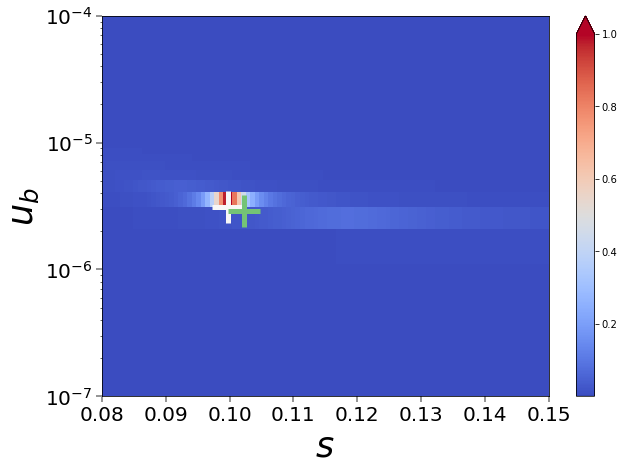

In [14]:
# Plotting the maximum likelihood estimates on a colormesh plot
import matplotlib.colors as colors
import matplotlib.cbook as cbook

plt.close('all')
f, ax1 = plt.subplots(1, 1, sharey=True, sharex = True, figsize=(10, 7))

u_ben_min=0.1*10**-6
u_ben_max=10**-4
s_list=np.linspace(0.08,0.15,100)
mut_list=np.linspace(u_ben_min, u_ben_max, 100)

axisfont=25
titlefont=20
axislabelfont=35
tpfont = 14
m_size=8

# #VAFs
squared_distance_s = np.array([[np.log(squared_distance_calculation_nonsyn_cumulative_weightedbyerror_with_cutoff([mut, s], \
                                                                            VAF_info_nonsynonymous_cumulative, number_of_individuals, c, t, N_tau, lmin, lmax, n_bins)) for s in s_list] for mut in mut_list])
logProbs_hitch = (-squared_distance_s)

# Plot the density map using nearest-neighbor interpolation
x1_hitch = s_list
y1_hitch = mut_list
x1_hitch, y1_hitch = np.meshgrid(x1_hitch, y1_hitch)
max_x, max_y = np.unravel_index(np.argmax(logProbs_hitch), logProbs_hitch.shape)
z_max = logProbs_hitch[max_x, max_y]
z1_hitch = np.exp(logProbs_hitch)/np.exp(z_max)

cmap = plt.cm.coolwarm #define colors
pcm=ax1.pcolormesh(x1_hitch, y1_hitch, z1_hitch,  cmap = cmap)
f.colorbar(pcm,  ax=ax1, extend='max')   # shows colour legend

ax1.set_xlabel(r'$s$ ', fontsize = axislabelfont)
ax1.set_ylabel(r'$u_{b}$', fontsize = axislabelfont)
ax1.set_ylim([u_ben_min, u_ben_max])
ax1.set_yscale('log')


ax1.xaxis.set_tick_params(width=2, color = grey3, length = 6, labelsize = 20)
ax1.yaxis.set_tick_params(width=2, color = grey3, length = 6, labelsize = 20)

# calculate best values for mu (max points in 3D space (x,y,z))
xmax, ymax = np.unravel_index(np.argmax(z1_hitch), z1_hitch.shape)
uben_max = y1_hitch[xmax, ymax]
s_max = x1_hitch[xmax, ymax]

print('uben (ax1) = ', uben_max)
print('s (ax1) =', s_max)

ax1.scatter(s_max, uben_max, marker = '+', s = 1000, color = grey1, lw = 5)
# ax1.scatter(fitness, u_ben, marker = '+', s = 1000, color = 'black', lw = 5)
ax1.scatter(inferred_fitness, uben_max_nonsyn_NM, marker = '+', s = 1000, color = green3, lw = 5)
# plt.show()
# plt.savefig('Version_2_simulation_validation_nonsyn_2_par_fit_s_10p_2halftimes10minus6_n_bins_21.pdf', bbox_inches='tight')
# plt.savefig('sample_2D_MLE_plot_for_3times10minus6.pdf', bbox_inches='tight')

hist without zero is [1889, 1793, 1794, 1837, 1798, 1819, 1869, 1873, 1812, 1762, 1826, 1778, 1793, 1807, 1831, 1751, 1866, 1800, 1927, 1742, 814]
log_hist_for_plot is [-1.16954354 -1.22170093 -1.22114336 -1.19745732 -1.21891619 -1.20730423
 -1.1801876  -1.1780497  -1.21115992 -1.2391416  -1.20346335 -1.23010199
 -1.22170093 -1.21392312 -1.20072886 -1.24540407 -1.18179403 -1.21780446
 -1.14962674 -1.25055725 -2.01138604]
errors is [(0.02327709469420447, 0.023899523090627817, 0.023892780979277495, 0.023608140381940812, 0.023865869256965544, 0.023726053816990333, 0.023402771149143575, 0.023377473636266854, 0.023772386647087362, 0.02411139011218255, 0.023679989797480427, 0.024001341852428526, 0.023899523090627817, 0.02380564755382153, 0.023647250070866432, 0.024187928830130323, 0.023421798062672083, 0.02385244731861702, 0.023043764249553567, 0.02425109431452821, 0.035678973659815316), (0.02274757389814086, 0.02334164302037056, 0.023335211965669123, 0.023063626347250787, 0.0233095410089592

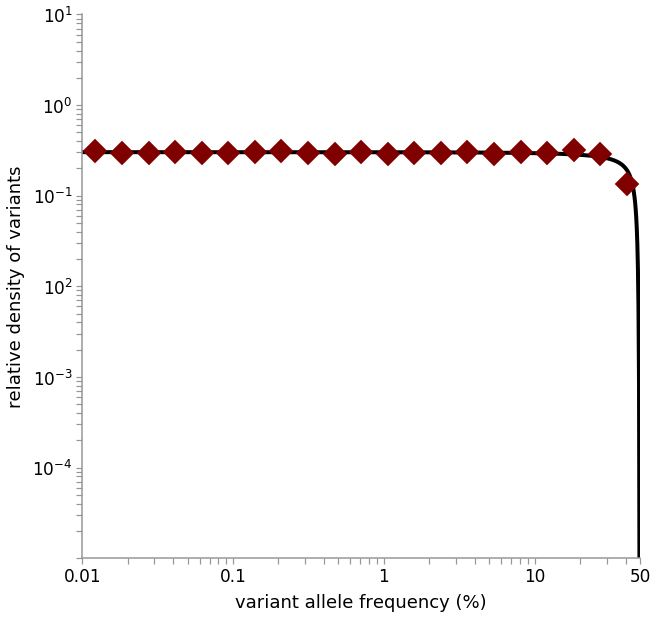

In [33]:
# Plot figure based on inferred values 
major_ticks = np.log(np.array([10**-k for k in range(5)]))                                         
major_tick_labels= ["$10^{-%s}$" % k for k in range(5)]

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(10,10))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)



#log binning : same bins and limits in the same simulation with same alpha

# not rescaled by u_neu
plot_log_hist_data_for_plot_simulation(nonsynonymous_trimmed, number_of_individuals, n_bins, lmin,\
                                                lmax, 'simulation', 'D', 15, 'maroon', 1.2, 0)


major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]



fmin=np.exp(lmin)
fmax=np.exp(lmax)

linear_VAF=np.array(np.linspace(fmin, fmax, 1000))
log_VAF=np.array(np.linspace(np.log(fmin), np.log(fmax), 1000))

density_beneficial_log=[np.log(Predicted_beneficial_with_cutoff(l, N_tau, uben_max_nonsyn_NM, inferred_fitness, t)) for l in log_VAF]
ax1.plot(log_VAF, density_beneficial_log, zorder=0, color='black', lw=4, label='neutral drift')


# plt.savefig('simulation_validation_nonsyn_VAF_s_10p_3times10minus6_n_bins_21.pdf', bbox_inches='tight')

# MLE based on all neutral mutations

In [15]:
# trim synonymous data (including merged calls with unmodified vaf)
phi=3*10**-3
log_phi=np.log(phi)
n_bins_above_phi=10 + 1
 
list_of_syn_vaf_hitchhikers = neutral_mutation

trimmed_lmin=np.log(trimmed_fmin)
trimmed_lmax=np.log(trimmed_fmax)


print('trimmed_fmax', trimmed_fmax, 'trimmed_fmin', trimmed_fmin)


hitchhikers_syn_VAF_above_phi=[]
for i in list_of_syn_vaf_hitchhikers:
    if log_phi < i < trimmed_fmax:
        hitchhikers_syn_VAF_above_phi.append(i)
        

VAF_info_syn = rescaled_VAF_densities_list_simulation_SD(hitchhikers_syn_VAF_above_phi, number_of_individuals, u_neu, n_bins_above_phi, log_phi, lmax)

VAF_info_syn_cumulative = rescaled_cumulative_VAF_densities_list_simulation_SD(hitchhikers_syn_VAF_above_phi, number_of_individuals, u_neu, n_bins_above_phi, log_phi, lmax)

print('number of nonempty bins:', len(VAF_info_syn))
print('number of bins:', len(VAF_info_syn_cumulative))
# print('VAF_info_syn: ', VAF_info_syn_cumulative)
# print('VAF_info_syn_cumulative: ', VAF_info_syn_cumulative)

trimmed_fmax 0.4999 trimmed_fmin 0.0001
bin_centres 10
bin_centres_without_zero 7
lower error: [0.18813673438313172, 0.24617920927727344, 0.3406260401632655, 0.40546510810816416, 0.6931471805599453, 2.3025850929940463, 2.3025850929940463]
upper error: [0.15828377123345083, 0.19738904510784128, 0.25361466317363535, 0.28768207245178123, 0.4054651081081644, 0.6931471805599454, 0.6931471805599454]
bin_centres 10
bin_centres_without_zero 7
lower error: [0.18813673438313172, 0.24617920927727344, 0.3406260401632655, 0.40546510810816416, 0.6931471805599453, 2.3025850929940463, 2.3025850929940463, nan, nan, nan]
upper error: [0.15828377123345083, 0.19738904510784128, 0.25361466317363535, 0.28768207245178123, 0.4054651081081644, 0.6931471805599454, 0.6931471805599454, nan, nan, nan]
number of nonempty bins: 7
number of bins: 10


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


In [16]:
# Optimize faster
u_norm = 1
lmin = log_phi
lmax = lmax
n_bins = n_bins_above_phi + 1
print('n_bins', n_bins)
# n_bins = 8

list_relevant_logfreq = []
for datapoint in VAF_info_syn_cumulative:

        logfreq = datapoint[0] 
        list_relevant_logfreq.append(logfreq)
 
normalized_HH_prediction = {}
bin_size=(lmax-lmin)/(n_bins-1)
for logfreq in list_relevant_logfreq:
          
    if logfreq+bin_size/2<np.log(0.5):
        predicted_density=integrate.quad(lambda l: (hitchhikers_reed_model_1(l, N_tau, t, u_norm, fitness))/bin_size,\
                                         logfreq-bin_size/2, logfreq+bin_size/2)[0]
    else:
        predicted_density=integrate.quad(lambda l: (hitchhikers_reed_model_1(l, N_tau, t, u_norm, fitness))/(bin_size/2),\
                                 logfreq-bin_size/2, logfreq)[0]
            
        
    normalized_HH_prediction[logfreq] = predicted_density    

n_bins 12


In [17]:
normalized_HH_prediction

{-5.553353200826457: 15459573.031558301,
 -5.0417736218513145: 9293643.017068457,
 -4.5301940428761736: 5454888.446063384,
 -4.018614463901033: 3045984.2473053792,
 -3.5070348849258903: 1544106.1297641024,
 -2.995455305950749: 651001.0243079993,
 -2.483875726975607: 191011.73791658087,
 -1.9722961480004657: 25884.670855402714,
 -1.4607165690253239: 531.7164470620426,
 -0.9491369900501827: 0.009101381009829362}

In [18]:

def squared_distance_calculation_HH_simulated_cumulative_optimize_faster(params, data, study_total, u_syn, age, N_tau, lmin, lmax, n_bins): 
    
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    u_driver = params[0]
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total*u_syn
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[4]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data
        
        if logfreq+bin_size/2<np.log(0.5):
            predicted_density=u_driver*normalized_HH_prediction[logfreq]
        else:
            predicted_density=u_driver*normalized_HH_prediction[logfreq]

        predicted_cumulative_density = predicted_cumulative_density + predicted_density



        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

            if square_distance!=square_distance:
                print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
            SD = math.sqrt(cumulative_num_data)/(bin_size*normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:

#                 if cumulative_data_density != cumulative_data_density:
#                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

    return total_square_distance

In [19]:
#  infer rate of driver mutation
import scipy
print('N_tau fixed at:', N_tau)

u_ben_guess = 6*10**-4
initial_guess=[u_ben_guess]
                                                                            

outcome=scipy.optimize.minimize(squared_distance_calculation_HH_simulated_cumulative_optimize_faster, initial_guess,\
                                args=(VAF_info_syn_cumulative, number_of_individuals, u_neu, t, N_tau, log_phi, lmax, n_bins_above_phi), method='Nelder-Mead', \
                                options={'maxfev':1000000, 'maxiter':1000000} )

print('Success of fitting outcome is', outcome.success)

print('faster optimization: best-fit values for driver mutation rate free:',  outcome.x)

inferred_u_driver = outcome.x[0]


N_tau fixed at: 100000
cumulative_data_density 1.3031533979566075 predicted_cumulative_density -13.045688059225961
cumulative_data_density 2.606306795913215 predicted_cumulative_density -52.10574951770701
cumulative_data_density 7.818920387739645 predicted_cumulative_density -144.75211730355574
cumulative_data_density 19.54730096934911 predicted_cumulative_density -327.5111721418836
cumulative_data_density 35.1851417448284 predicted_cumulative_density -654.8044789056958
cumulative_data_density 62.55136310191716 predicted_cumulative_density -1212.4230599298187
cumulative_data_density 106.8585786324418 predicted_cumulative_density -2139.997441823343
cumulative_data_density 1.3031533979566075 predicted_cumulative_density -13.045688059225961
cumulative_data_density 2.606306795913215 predicted_cumulative_density -52.10574951770701
cumulative_data_density 7.818920387739645 predicted_cumulative_density -144.75211730355574
cumulative_data_density 19.54730096934911 predicted_cumulative_density 

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in log


In [20]:
def confidence_interval_95_HH(mut_list, z1_HH_normalized, gene_color):

    cumulative_prob=0.0

    mut_95_range=[]
    mut_range_probs = []
    mut_cumulative_prob_95_range=[]
    for i in range(len(z1_HH_normalized)):
        mut=mut_list[i]
        p=z1_HH_normalized[i]
#         print(p)
        mut_range_probs.append((mut,p))
        cumulative_prob=cumulative_prob+p
#         print(cumulative_prob)
        if 0.05<cumulative_prob<0.95:
            mut_95_range.append(mut)
            mut_cumulative_prob_95_range.append((mut, p, cumulative_prob))
    
#     print(s_cumulative_prob_95_range)
            
    min_mut=min(mut_95_range)
    max_mut=max(mut_95_range)
    
    print('95% confidence interval for total driver mutation rate: lower =', min_mut)
    print('95% confidence interval for total driver mutation rate: upper =', max_mut)
    
    #plotting the most likely s
    xmax= np.unravel_index(np.argmax(z1_HH_normalized), z1_HH.shape)
    list_of_index=list(xmax)
    index=list_of_index[0]
    mut_mle = mut_list[index]

    #plot distribution
    mut_list = []
    probs_list = []
    for (mut, probs) in mut_range_probs:
        mut_list.append(mut)
        probs_list.append(probs)

    ax1.plot(mut_list, probs_list, color = gene_color, lw = 2)

    #plot confidence interval
    ax1.plot([min_mut, min_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([max_mut, max_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([mut_mle, mut_mle], [0, 1], linestyle = ':', color = gene_color, lw = 2)

    # Set axis limits
    ax1.set_ylim(0, (max(probs_list)+0.002))

    
    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1, min_mut, max_mut

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in log


z1_HH_normalized normalized to: 1.0000000000000013
95% confidence interval for total driver mutation rate: lower = 2.6376376376376375e-06
95% confidence interval for total driver mutation rate: upper = 3.742742742742742e-06


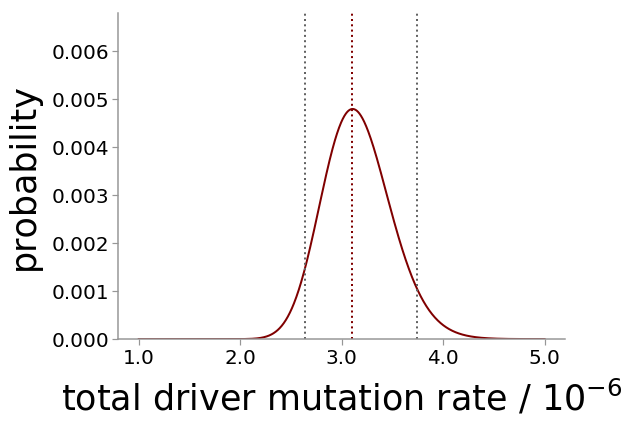

In [24]:
# Calculate the likelihood matrix and plot confidence interval 
plt.close('all')
f, ax1 = plt.subplots(1, 1, sharey=True, sharex = True, figsize=(8, 6))

u_ben_min=1*10**-6
u_ben_max=5*10**-6

mut_list=np.linspace(u_ben_min, u_ben_max, 1000)


squared_distance_cumulative_HH = np.array([squared_distance_calculation_HH_simulated_cumulative_optimize_faster([mut], VAF_info_syn_cumulative, number_of_individuals, u_neu, t, N_tau, log_phi, lmax, n_bins_above_phi) for mut in mut_list])



logProbs_HH = (-squared_distance_cumulative_HH)
max_x= np.unravel_index(np.argmax(logProbs_HH), logProbs_HH.shape)
z_max = logProbs_HH[max_x]
z1_HH = np.exp(logProbs_HH-(z_max))
z1_HH_normalized= z1_HH/sum(z1_HH)
print('z1_HH_normalized normalized to:', sum(z1_HH_normalized))


mg_mut = np.meshgrid(mut_list)
ax1, min_s, max_s = confidence_interval_95_HH(mut_list, z1_HH_normalized, 'maroon')


x_major_ticks=[  1*10**-6, 2*10**-6, 3*10**-6, 4*10**-6, 5*10**-6]
x_major_tick_labels=[ '1.0', '2.0', '3.0','4.0', '5.0']
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels)

# Axis labels
ax1.set_xlabel('total driver mutation rate / $10^{-6}$', fontsize = 35, labelpad = 10, fontweight = 'medium')
ax1.set_ylabel('probability', fontsize = 35, labelpad = 10, fontweight = 'medium')

ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 20, top = False, labeltop = False)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 20)

# plt.savefig('95CI_theory_bound_first_ben_mut_9times10minus7.pdf', bbox_inches='tight')
# plt.savefig('sample_1D_MLE_plot_for_3times10minus6.pdf', bbox_inches='tight')
# plt.savefig('Version_2_simulation_validation_HH_1_par_fit_s_10p_2halftimes10minus6_n_bins_above_phi_10.pdf', bbox_inches='tight')
plt.show()

inferred_u_ben_95CIupper= 9.692792792792792e-06
inferred_u_ben_95CIlower= 7.988288288288289e-06


hist without zero is [54783, 42987, 28725, 15051, 5351, 1023, 131, 24, 18, 14, 7, 4, 1, 1]
log_hist_for_plot is [11.19682008 10.95433789 10.55120797  9.90488458  8.87072361  7.21617964
  5.16088219  3.4637387   3.17605663  2.9247422   2.23159502  1.67197923
  0.28568487  0.28568487]
errors is [(0.004281604036416198, 0.0048348263181345885, 0.005917719340621019, 0.008184522679645312, 0.013764741876705955, 0.03176446099265462, 0.09142518242171338, 0.22831206664763704, 0.2687978542092351, 0.31096604159333596, 0.47475807052558183, 0.6931471805599452, 2.3025850929940455, 2.3025850929940455), (0.0042633500319411155, 0.004811563200643576, 0.005882905853871634, 0.008118079704305003, 0.013577843455450989, 0.030786465804677476, 0.08376230967614351, 0.1857524522288414, 0.21163944036928672, 0.23685806943961385, 0.3206073906983238, 0.4054651081081646, 0.6931471805599454, 0.6931471805599454)]


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


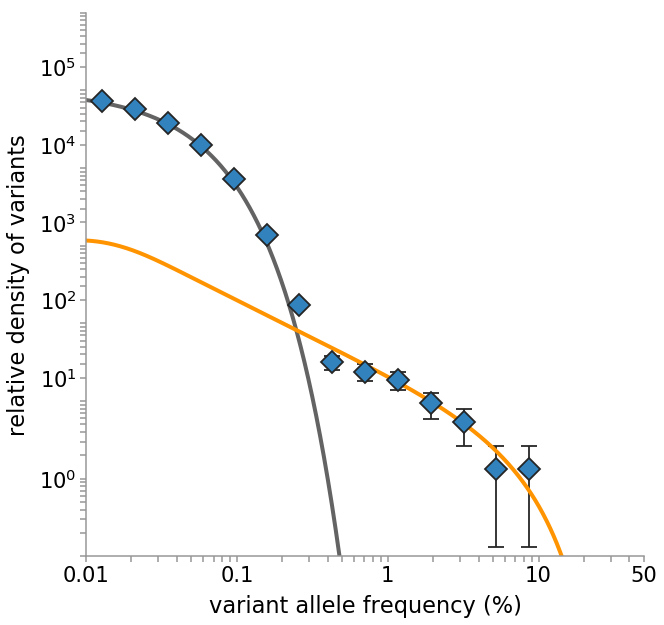

In [31]:
# Plot VAF spectra

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(10,10))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)

plot_fmin=0.01/100
plot_nbins = 17

plot_log_hist_data_for_plot_rescaled_simulation_2(hitchhikers_syn_VAF_above_phi, number_of_individuals, u_neu, plot_nbins, np.log(plot_fmin), lmax, 'simulation', 'D', 15, blue4, 1.5, 0)


major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]


fmin=np.exp(lmin)
fmax=np.exp(lmax)

linear_VAF=np.array(np.linspace(plot_fmin, fmax, 1000))
log_VAF=np.array(np.linspace(np.log(plot_fmin), np.log(fmax), 1000))

density_neutral_drift_log=[np.log(Predicted_drift_with_cutoff(l, N_tau, c, t)) for l in log_VAF]
ax1.plot(log_VAF, density_neutral_drift_log, zorder=0, color=grey4, lw=4, label='neutral drift')


# density_hitchhiker_all_drivers_true_values_log_2=[np.log(hitchhikers_reed_model_1(l, N_tau, t,  u_ben, fitness)) for l in log_VAF]
# ax1.plot(log_VAF, density_hitchhiker_all_drivers_true_values_log_2, color=c3, zorder=0, lw=4, label='uncontinuous feeding rate')


density_hitchhiker_all_drivers_log=[np.log(hitchhikers_reed_model_1(l, N_tau, t,  inferred_u_driver, inferred_fitness)) for l in log_VAF]
ax1.plot(log_VAF, density_hitchhiker_all_drivers_log, color=c3, zorder=0, lw=4, label='uncontinuous feeding rate')
# ax1.axvline(x=log_phi, color=grey3, linestyle='--', linewidth=3)

# plt.savefig('Reed_model_Simulation_validation_s_10p_age_70_uneu_10minus4_uben_3times10minus6.pdf', bbox_inches='tight')
# ax1.legend()
# plt.savefig('Simulation_validation_bound_first_ben_mut_synVAFabovephi_s_10p_3times10minus6_n_bins_above_phi_10_dark_outline.pdf', bbox_inches='tight')
# plt.savefig('Reed_model_0pt5_phi_s_10p_age_120_uneu_10minus5_uben_3times10minus6_not_allowing_multiple_mutants.pdf', bbox_inches='tight')

In [23]:
print('The actual u_ben is:', u_ben, 'fitness:', fitness)

The actual u_ben is: 9.499999999999999e-06 fitness: 0.1


In [24]:
print('The best-fit u_ben is:', inferred_u_driver, ' upper 95CI:', inferred_u_ben_95CIupper, ' lower 95CI:', inferred_u_ben_95CIlower)

The best-fit u_ben is: 8.825683593748506e-06  upper 95CI: 9.692792792792792e-06  lower 95CI: 7.988288288288289e-06


In [25]:
print('The inferred s is', inferred_fitness)

The inferred s is 0.10477141566051387


### Stored results for correlation plot 

In [106]:
# Reed model, age 70


True_u_ben=[1e-06, 1.5e-06, 2e-06, 2.5e-06, 3e-06, 3.5e-06, 4e-06, 4.5e-06, 5e-06, 5.5e-06, \
            6e-06, 6.5e-06, 7e-06, 7.5e-06, 8e-06, 8.5e-06, 9e-06, 9.5e-06, 1e-05] 

Inferred_u_ben=[9.228515624984845e-07, 1.494140624998486e-06, 2.1093749999984876e-06, 2.255859374998488e-06, 3.1054687499984903e-06, 2.8271484374984897e-06, \
                4.072265624998492e-06, 4.3139648437484935e-06, 4.804687499998495e-06, 5.947265624998497e-06, 4.6655273437484945e-06, 6.276855468748498e-06,\
                6.4160156249984985e-06, 6.503906249998499e-06, 7.807617187498503e-06, 7.514648437498502e-06, 7.587890624998502e-06, 8.825683593748506e-06 , 7.836914062498503e-06]
      
Inferred_u_ben_upperCI=[1.3882882882882883e-06, 1.9729729729729726e-06, 2.6486486486486483e-06, 2.8351351351351346e-06, 3.738738738738738e-06, 3.449549549549549e-06,\
                        4.774774774774774e-06, 5.045045045045044e-06, 5.5855855855855844e-06, 6.779279279279278e-06, 5.414414414414414e-06, 7.126126126126125e-06,\
                        7.270270270270268e-06, 7.373873873873872e-06, 8.74144144144144e-06,8.434234234234233e-06, 8.503603603603602e-06, 9.692792792792792e-06, 8.781081081081081e-06]

Inferred_u_ben_lowerCI=[6.648648648648648e-07, 1.1801801801801798e-06, 1.7207207207207205e-06, 1.8738738738738737e-06, 2.639639639639639e-06, 2.369369369369369e-06,\
                        3.522522522522522e-06, 3.7468468468468463e-06, 4.216216216216215e-06, 5.272972972972972e-06, 4.072072072072071e-06, 5.590090090090089e-06,\
                        5.711711711711711e-06, 5.7981981981981975e-06, 7.027027027027026e-06, 6.749549549549549e-06, 6.809009009009008e-06, 7.988288288288289e-06, 7.0567567567567555e-06]

Inferred_u_ben_upperCI=[Inferred_u_ben_upperCI[i]-Inferred_u_ben[i] for i in range(len(Inferred_u_ben_upperCI))]
Inferred_u_ben_lowerCI=[-Inferred_u_ben_lowerCI[i]+Inferred_u_ben[i] for i in range(len(Inferred_u_ben_lowerCI))]
err=[tuple(Inferred_u_ben_lowerCI),tuple(Inferred_u_ben_upperCI)]


[1e-06, 1.5e-06, 2e-06, 2.5e-06, 3e-06, 3.5e-06, 4e-06, 4.5e-06, 5e-06, 5.5e-06, 6e-06, 6.5e-06, 7e-06, 7.5e-06, 8e-06, 8.5e-06, 9e-06, 9.5e-06, 1e-05]
[9.228515624984845e-07, 1.494140624998486e-06, 2.1093749999984876e-06, 2.255859374998488e-06, 3.1054687499984903e-06, 2.8271484374984897e-06, 4.072265624998492e-06, 4.3139648437484935e-06, 4.804687499998495e-06, 5.947265624998497e-06, 4.6655273437484945e-06, 6.276855468748498e-06, 6.4160156249984985e-06, 6.503906249998499e-06, 7.807617187498503e-06, 7.514648437498502e-06, 7.587890624998502e-06, 8.825683593748506e-06, 7.836914062498503e-06]


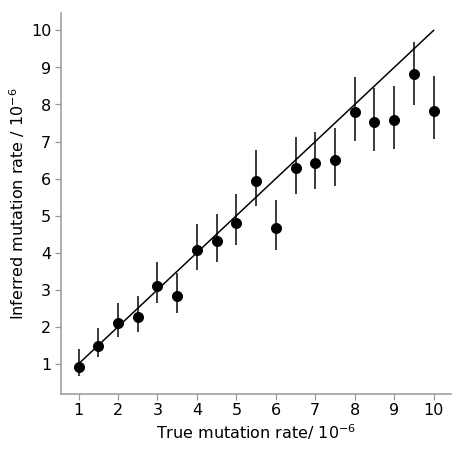

In [110]:
# True mutation rate versus inferred mutation rate, age 70

import matplotlib.pyplot as plt
plt.close()
f, ax = plt.subplots(figsize=(7,7)) # set the size that you'd like (width, height)  

u_ben_min=10**-6
u_ben_max=10**-5
print(True_u_ben)
print(Inferred_u_ben)

x_vector=np.linspace(u_ben_min, u_ben_max, 100)
y_vector=x_vector
ax.plot(x_vector, y_vector, zorder=0, color='black')

ax.set_xlabel('True mutation rate/ $10^{-6}$', fontsize=16)
ax.set_ylabel('Inferred mutation rate / $10^{-6}$', fontsize=16)

x_major_ticks = [10**-6, 2*10**-6, 3*10**-6, 4*10**-6, 5*10**-6, 6*10**-6, 7*10**-6, 8*10**-6, 9*10**-6, 10**-5]
x_major_tick_labels =  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']              
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels, fontsize = 16)
ax.xaxis.set_tick_params(width=1.2, color = grey3, length = 6)

y_major_ticks = [10**-6, 2*10**-6, 3*10**-6, 4*10**-6, 5*10**-6, 6*10**-6, 7*10**-6, 8*10**-6, 9*10**-6, 10**-5]
y_major_tick_labels =  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']              
ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels, fontsize = 16)
ax.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)

ax.errorbar(True_u_ben, Inferred_u_ben, yerr= err, fmt = 'o', markersize = 10, ecolor = 'black', color='black', zorder=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_color(grey3)

# plt.savefig('Overall_simulation_validation_age_70_bound_first_ben_mut_bigger_fontsize.pdf', bbox_inches='tight')
# plt.savefig('Overall_simulation_validation_age_70_Reed_model.pdf', bbox_inches='tight')
# plt.savefig('Overall_simulation_validation_age_70_Reed_model_smaller_font.pdf', bbox_inches='tight')


# Breaking down the passenger spectrum into two classes

In [97]:
# trim data 

trimmed_lmin=np.log(trimmed_fmin)
trimmed_lmax=np.log(trimmed_fmax)


print('trimmed_fmax', trimmed_fmax, 'trimmed_fmin', trimmed_fmin)


hitchhikers_trimmed=[]
for i in list_of_hitchhikers:
    if trimmed_fmin < i < trimmed_fmax:
        hitchhikers_trimmed.append(i)
        
  
VAF_info_hitchhikers = rescaled_VAF_densities_list_simulation_SD(hitchhikers_trimmed, number_of_individuals, u_neu, n_bins, lmin, lmax)

VAF_info_hitchhikers_cumulative = rescaled_cumulative_VAF_densities_list_simulation_SD(hitchhikers_trimmed, number_of_individuals, u_neu, n_bins, lmin, lmax)

print('number of nonempty bins:', len(VAF_info_hitchhikers))
print('number of all bins:', len(VAF_info_hitchhikers_cumulative))

trimmed_fmax 0.4999 trimmed_fmin 0.0001
bin_centres 20
bin_centres_without_zero 16
lower error: [0.03036377928320544, 0.034818484559274054, 0.04140065699923401, 0.04845351667480102, 0.05818365416628435, 0.07490544166970725, 0.08863330210989062, 0.1064892129027788, 0.13353139262452274, 0.17211052686643935, 0.18516260990092404, 0.2687978542092355, 0.40546510810816416, 0.47475807052558183, 2.302585092994045, 2.302585092994045]
upper error: [0.029468924637361837, 0.03364683826238313, 0.03975456609256511, 0.04621387408129607, 0.05498365143561479, 0.06968349768855564, 0.0814130541364042, 0.09623271273558931, 0.11778303565638293, 0.14679271888214895, 0.15617507302767208, 0.21163944036928672, 0.2876820724517808, 0.3206073906983238, 0.6931471805599454, 0.6931471805599454]
bin_centres 20
bin_centres_without_zero 16
lower error: [0.03036377928320544, 0.034818484559274054, 0.04140065699923401, 0.04845351667480102, 0.05818365416628435, 0.07490544166970725, 0.08863330210989062, 0.1064892129027788, 0

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


hist without zero is [1083, 817, 607, 439, 338, 210, 129, 112, 73, 49, 35, 24, 15, 6, 6, 1]
log_hist_for_plot is [7.48448421 7.20263306 6.90552276 6.58149338 6.32003986 5.8441015
 5.35680637 5.21549284 4.78745341 4.38881426 4.05234203 3.6750478
 3.20504417 2.28875343 2.28875343 0.49699397]
errors is [(0.03085810793505761, 0.03561222586587842, 0.041435461739681934, 0.04890393643110169, 0.055928049154785775, 0.07150304354966508, 0.09216473161314909, 0.0992581930400771, 0.12447667878007529, 0.15415067982725805, 0.18516260990092448, 0.22831206664763704, 0.2986741172267169, 0.5246681416422596, 0.5246681416422596, 2.302585092994047), (0.02993432034049448, 0.03438748596998309, 0.03978665674949866, 0.04662343373237654, 0.05296508402412847, 0.06672976479700843, 0.08438259117109403, 0.09028952305731774, 0.11068335664773965, 0.13353139262452274, 0.1561750730276712, 0.1857524522288414, 0.22968124573976523, 0.3423465848483054, 0.3423465848483054, 0.6931471805599454)]


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


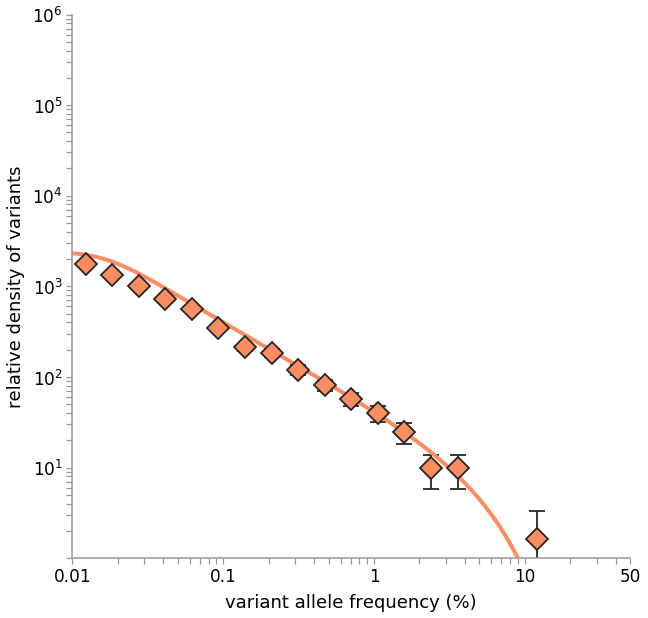

In [99]:
# Plot figure 


major_ticks = np.log(np.array([10**-k for k in range(5)]))                                         
major_tick_labels= ["$10^{-%s}$" % k for k in range(5)]

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(10,10))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)

plot_log_hist_data_for_plot_rescaled_simulation(hitchhikers_trimmed, number_of_individuals, u_neu, n_bins, lmin, \
                                                lmax, 'simulation', 'D', 15, '#fc8d62', 1.2, 0)

# plot_log_hist_data_for_plot_rescaled_simulation(HH_with_single_driver_trimmed, number_of_individuals, u_neu, n_bins, lmin, lmax, 'simulation', 'D', 15, 'goldenrod', 1.2, 0)


major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]


fmin=np.exp(lmin)
fmax=np.exp(lmax)

linear_VAF=np.array(np.linspace(fmin, fmax, 1000))
log_VAF=np.array(np.linspace(np.log(fmin), np.log(fmax), 1000))

density_ben_neu_hitchhiker_log=[np.log(hitchhikers_reed_model_1(l, N_tau, t, u_ben, fitness)) for l in log_VAF]

ax1.plot(log_VAF, density_ben_neu_hitchhiker_log, zorder=0, color='#fc8d62', lw=4, label='alternative best-fit HH theory')


# plt.savefig('HH_all_s_10_percent_uben_7times10minus6_with_cutoff.pdf', bbox_inches='tight')

# beneficial-first hitchhikers

In [100]:
# trim data

trimmed_lmin=np.log(trimmed_fmin)
trimmed_lmax=np.log(trimmed_fmax)


print('trimmed_fmax', trimmed_fmax, 'trimmed_fmin', trimmed_fmin)


ben_neu_hitchhikers_trimmed=[]
for i in list_of_ben_neu_hitchhikers:
    if trimmed_fmin < i < trimmed_fmax:
        ben_neu_hitchhikers_trimmed.append(i)
        
  
VAF_info_ben_neu_hitchhikers = rescaled_VAF_densities_list_simulation_SD(ben_neu_hitchhikers_trimmed, number_of_individuals, u_neu, n_bins, lmin, lmax)

VAF_info_ben_neu_hitchhikers_cumulative = rescaled_cumulative_VAF_densities_list_simulation_SD(ben_neu_hitchhikers_trimmed, number_of_individuals, u_neu, n_bins, lmin, lmax)

print('number of nonempty bins:', len(VAF_info_ben_neu_hitchhikers))
print('number of all bins:', len(VAF_info_ben_neu_hitchhikers_cumulative))

trimmed_fmax 0.4999 trimmed_fmin 0.0001
bin_centres 20
bin_centres_without_zero 15
lower error: [0.030572722363344518, 0.03521941313267973, 0.041860036312326265, 0.049367050876779395, 0.06040949801927642, 0.07745961259221623, 0.09330797425749182, 0.11272127097958418, 0.1420858616474856, 0.18516260990092404, 0.20946532190636624, 0.31096604159333596, 0.5246681416422596, 0.5246681416422596, 2.302585092994045]
upper error: [0.029665692822701928, 0.034021090640569795, 0.04017795012934133, 0.04704416946063983, 0.056967153828304085, 0.07188856754276163, 0.08533980460831536, 0.1012925751559619, 0.12438628454808498, 0.15617507302767208, 0.17309767773549112, 0.23685806943961385, 0.3423465848483054, 0.3423465848483054, 0.6931471805599454]
bin_centres 20
bin_centres_without_zero 15
lower error: [0.030572722363344518, 0.03521941313267973, 0.041860036312326265, 0.049367050876779395, 0.06040949801927642, 0.07745961259221623, 0.09330797425749182, 0.11272127097958418, 0.1420858616474856, 0.185162609900

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


hist without zero is [1068, 799, 593, 424, 319, 197, 118, 100, 66, 42, 31, 17, 14, 3, 4, 1]
log_hist_for_plot is [7.47053698 7.18035491 6.88218836 6.54672742 6.26218507 5.78019769
 5.26767859 5.10216415 4.68664871 4.23466358 3.93098117 3.33020731
 3.13605129 1.59560625 1.88328833 0.49699397]
errors is [(0.031077442952986978, 0.036018401191012295, 0.04193206679512507, 0.04978316480516831, 0.057617726350176035, 0.07391250662994686, 0.09657418629286241, 0.10536051565782678, 0.13135261471936843, 0.1675945533725427, 0.19796971553855292, 0.27777877245548055, 0.31096604159333596, 0.8612115025164903, 0.6931471805599452, 2.302585092994047), (0.030140674734600026, 0.034766052874546816, 0.040244302681404776, 0.04742188861948904, 0.05447800634550859, 0.06882343712247607, 0.08806349662495272, 0.09531017980432477, 0.11608514258857916, 0.1434970017934818, 0.1651798927155621, 0.21715415063904597, 0.23685806943961385, 0.4557463944083262, 0.4054651081081644, 0.6931471805599454)]


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log


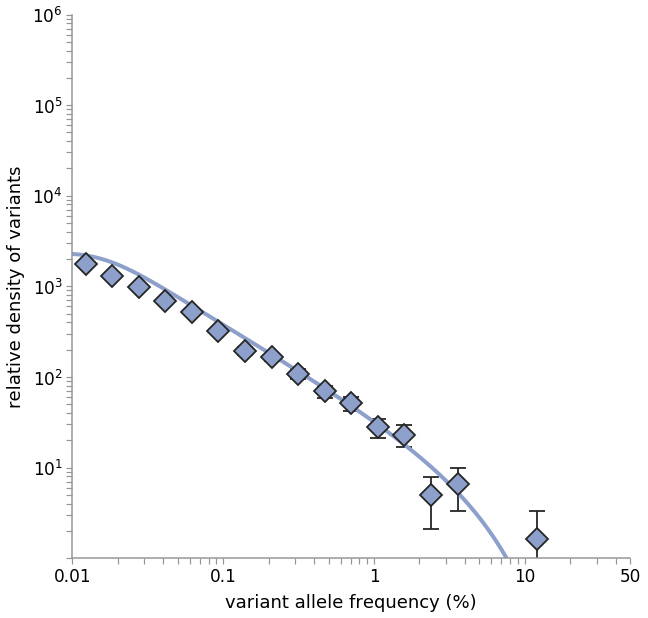

In [102]:
# Plot figure 


major_ticks = np.log(np.array([10**-k for k in range(5)]))                                         
major_tick_labels= ["$10^{-%s}$" % k for k in range(5)]

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(10,10))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)



#log binning : same bins and limits in the same simulation with same alpha


plot_log_hist_data_for_plot_rescaled_simulation(ben_neu_hitchhikers_trimmed, number_of_individuals, u_neu, n_bins,\
                                                lmin, lmax, 'simulation', 'D', 15, '#8da0cb', 1.2, 0)


major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]


fmin=np.exp(lmin)
fmax=np.exp(lmax)

linear_VAF=np.array(np.linspace(fmin, fmax, 1000))
log_VAF=np.array(np.linspace(np.log(fmin), np.log(fmax), 1000))

density_ben_neu_hitchhiker_log=[np.log(hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_ben, fitness)) for l in log_VAF]

ax1.plot(log_VAF, density_ben_neu_hitchhiker_log, zorder=0, color='#8da0cb', lw=4, label='alternative best-fit HH theory')


# plt.savefig('HH_bn_s_10_percent_uben_7times10minus6_with_cutoff.pdf', bbox_inches='tight')

# neutral-first hitchhikers

In [103]:
# trim data

trimmed_lmin=np.log(trimmed_fmin)
trimmed_lmax=np.log(trimmed_fmax)


print('trimmed_fmax', trimmed_fmax, 'trimmed_fmin', trimmed_fmin)


neu_ben_hitchhikers_trimmed=[]
for i in list_of_neu_ben_hitchhikers:
    if trimmed_fmin < i < trimmed_fmax:
        neu_ben_hitchhikers_trimmed.append(i)
        
  
VAF_info_neu_ben_hitchhikers = rescaled_VAF_densities_list_simulation_SD(neu_ben_hitchhikers_trimmed, number_of_individuals, u_neu, n_bins, lmin, lmax)

VAF_info_neu_ben_hitchhikers_cumulative = rescaled_cumulative_VAF_densities_list_simulation_SD(neu_ben_hitchhikers_trimmed, number_of_individuals, u_neu, n_bins, lmin, lmax)

print('number of nonempty bins:', len(VAF_info_neu_ben_hitchhikers))
print('number of all bins:', len(VAF_info_neu_ben_hitchhikers_cumulative))

trimmed_fmax 0.4999 trimmed_fmin 0.0001
bin_centres 20
bin_centres_without_zero 15
lower error: [0.2986741172267169, 0.26060626468676906, 0.3248304038551142, 0.2876820724517808, 0.2397821029348699, 0.3406260401632655, 0.3248304038551142, 0.3801304080661714, 0.47475807052558183, 0.592783600716708, 0.47475807052558183, 0.6931471805599452, 0.8612115025164906, 2.302585092994045, 2.302585092994045]
upper error: [0.22968124573976523, 0.20653904341649332, 0.24478769618157825, 0.2231435513142097, 0.19326208729997685, 0.2536146631736358, 0.24478769618157825, 0.2747698924083455, 0.3206073906983238, 0.3696400494024985, 0.3206073906983238, 0.4054651081081646, 0.4557463944083262, 0.6931471805599454, 0.6931471805599454]
bin_centres 20
bin_centres_without_zero 15
lower error: [0.2986741172267169, 0.26060626468676906, 0.3248304038551142, 0.2876820724517808, 0.2397821029348699, 0.3406260401632655, 0.3248304038551142, 0.3801304080661714, 0.47475807052558183, 0.592783600716708, 0.47475807052558183, 0.693

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


hist without zero is [15, 18, 14, 15, 19, 13, 11, 12, 7, 7, 4, 7, 1, 3, 2]
log_hist_for_plot is [3.20504417 3.38736572 3.13605129 3.20504417 3.44143294 3.06194332
 2.89488924 2.98190062 2.44290411 2.44290411 1.88328833 2.44290411
 0.49699397 1.59560625 1.19014115]
errors is [(0.2986741172267169, 0.2687978542092355, 0.31096604159333596, 0.2986741172267169, 0.26060626468676906, 0.32483040385511464, 0.3588363417595519, 0.3406260401632655, 0.4747580705255823, 0.4747580705255823, 0.6931471805599452, 0.4747580705255823, 2.302585092994047, 0.8612115025164903, 1.227947177299516), (0.22968124573976523, 0.21163944036928672, 0.23685806943961385, 0.22968124573976523, 0.20653904341649287, 0.24478769618157825, 0.2635261619552267, 0.2536146631736358, 0.32060739069832334, 0.32060739069832334, 0.4054651081081644, 0.32060739069832334, 0.6931471805599454, 0.4557463944083262, 0.5347999967395702)]


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log


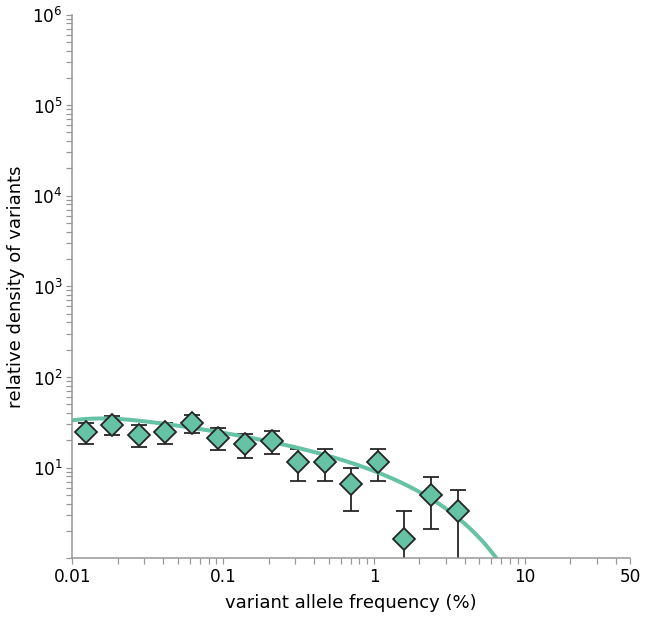

In [105]:
# Plot figure 
major_ticks = np.log(np.array([10**-k for k in range(5)]))                                         
major_tick_labels= ["$10^{-%s}$" % k for k in range(5)]

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(10,10))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)



#log binning : same bins and limits in the same simulation with same alpha


plot_log_hist_data_for_plot_rescaled_simulation(neu_ben_hitchhikers_trimmed, number_of_individuals, u_neu, n_bins, lmin, lmax, 'simulation', 'D', 15, '#66c2a5', 1.2, 0)


major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]


density_neutral_drift=[]
density_neutral_drift_log=[]

fmin=np.exp(lmin)
fmax=np.exp(lmax)

linear_VAF=np.array(np.linspace(fmin, fmax, 1000))
log_VAF=np.array(np.linspace(np.log(fmin), np.log(fmax), 1000))

density_neu_ben_hitchhiker_log=[np.log(minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_ben, fitness)) for l in log_VAF]

ax1.plot(log_VAF, density_neu_ben_hitchhiker_log, zorder=0, color='#66c2a5', lw=4, label='alternative best-fit HH theory')

# plt.savefig('HH_nb_s_10_percent_uben_7times10minus6_with_cutoff.pdf', bbox_inches='tight')

### Progression with age 

In [65]:
# import data : u_ben = 3 times 10^{-6}, s = 10 p at age 70  

major_ticks = np.log(np.array([10**-k for k in range(6)]))                                         
major_tick_labels= ["$10^{-%s}$" % k for k in range(6)]


number_of_individuals=15000
u_neu = 10**-4
u_ben = 3*10**-6
fitness = 0.1
n_bins = 21
n_bins_above_phi=16
N_tau=10**5
c=1
t=70
trimmed_fmin=10**-4
trimmed_fmax=0.4999
lmin=np.log(trimmed_fmin)
lmax=np.log(trimmed_fmax)

neutral_mutation=[]
neutral_mutation_hitchhiker=[]
neutral_mutation_beneficial_first=[]
neutral_mutation_beneficial_later=[]
neutral_mutation_HH_with_single_driver=[]
neutral_mutation_HH_with_two_drivers=[]
neutral_mutation_not_hitchhiker=[]

all_beneficial_mutation=[]



vector_of_all_beneficial_mutation='beneficial_mutation_s_10_percent_70_gen_uben_3times10minus6.csv' 
vector_of_first_beneficial_mutation='beneficial_mutation_first_mutant_s_10_percent_70_gen_uben_3times10minus6.csv' 
vector_of_double_beneficial_mutants='eneficial_mutation_double_mutant_s_10_percent_70_gen_uben_3times10minus6.csv' 


vector_of_neutral_mutation='neutral_mutation_s_10_percent_70_gen_uben_3times10minus6.csv'
vector_of_neutral_mutation_not_hitchhiker='neutral_mutation_not_hitchhiker_s_10_percent_70_gen_uben_3times10minus6.csv'
vector_of_neutral_mutation_beneficial_first='neutral_mutation_beneficial_first_s_10_percent_70_gen_uben_3times10minus6.csv' 
vector_of_neutral_mutation_beneficial_later='neutral_mutation_hitchhiker_beneficial_later_s_10_percent_70_gen_uben_3times10minus6.csv' 
vector_of_neutral_mutation_hitchhiker='neutral_mutation_hitchhiker_s_10_percent_70_gen_uben_3times10minus6.csv' 

# vector_of_neutral_HH_with_single_driver='data with HH driver no/neutral_mutation_HH_with_single_driver_s_10_percent_70_gen_uben_7times10minus6.csv'
# vector_of_neutral_HH_with_two_drivers='data with HH driver no/neutral_mutation_HH_with_two_drivers_s_10_percent_70_gen_uben_7times10minus6.csv'


with open(vector_of_neutral_mutation) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2      # converted to 1/2 in the diploid biology world
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation.append(clone_freq)     


with open(vector_of_neutral_mutation_hitchhiker) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_hitchhiker.append(clone_freq)     

# with open(vector_of_neutral_HH_with_single_driver) as data:
#     reader = csv.reader(data,delimiter=',')
#     next(reader, None)   #skips header
#     for row in reader:
#         try:            
#             clone_freq= float(row[1])/2
#         except: # catch the error    
#         #except IndexError: # catch the error
#                 pass # pass will basically ignore it
#          # and execution will continue on to whatever comes
#          # after the try/except block
#         #print((row[1]))
#         neutral_mutation_HH_with_single_driver.append(clone_freq)   
        
# with open(vector_of_neutral_HH_with_two_drivers) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_HH_with_two_drivers.append(clone_freq)   
        
with open(vector_of_neutral_mutation_beneficial_first) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_beneficial_first.append(clone_freq)     

with open(vector_of_neutral_mutation_beneficial_later) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_beneficial_later.append(clone_freq)     

with open(vector_of_neutral_mutation_not_hitchhiker) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_not_hitchhiker.append(clone_freq)     
        
with open(vector_of_all_beneficial_mutation) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        all_beneficial_mutation.append(clone_freq)     
        
    
neutral_mutation=list(filter(lambda a: a != 0.0, neutral_mutation))
neutral_mutation_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_hitchhiker))
neutral_mutation_beneficial_first=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_first))
neutral_mutation_beneficial_later=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_later))
# neutral_mutation_HH_with_single_driver=list(filter(lambda a: a != 0.0, neutral_mutation_HH_with_single_driver))
# neutral_mutation_HH_with_two_drivers=list(filter(lambda a: a != 0.0, neutral_mutation_HH_with_two_drivers))
neutral_mutation_not_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_not_hitchhiker))
all_beneficial_mutation=list(filter(lambda a: a != 0.0, all_beneficial_mutation))

            
lneutral_mutation=np.log(np.array(neutral_mutation))  
lneutral_mutation_hitchhiker=np.log(np.array(neutral_mutation_hitchhiker))  
lneutral_mutation_beneficial_first=np.log(np.array(neutral_mutation_beneficial_first))
lneutral_mutation_beneficial_later=np.log(np.array(neutral_mutation_beneficial_later))  
lneutral_mutation_not_hitchhiker=np.log(np.array(neutral_mutation_not_hitchhiker)) 
    
all_data=[neutral_mutation, neutral_mutation_hitchhiker,neutral_mutation_beneficial_first,neutral_mutation_beneficial_later,\
         neutral_mutation_not_hitchhiker]
all_log_data=[lneutral_mutation, lneutral_mutation_hitchhiker,lneutral_mutation_beneficial_first,\
              lneutral_mutation_beneficial_later,lneutral_mutation_not_hitchhiker]

list_of_hitchhikers=all_data[1]
list_of_ben_neu_hitchhikers=all_data[2]
list_of_neu_ben_hitchhikers=all_data[3]
list_of_nonhitchhikers=all_data[4]
list_of_nonsynonymous=all_beneficial_mutation

# list_of_HH_with_single_driver = neutral_mutation_HH_with_single_driver

# list_of_HH_with_two_drivers = neutral_mutation_HH_with_two_drivers

# print('Before trimming HH:', len(list_of_hitchhikers), 'HH with a single driver:', len(list_of_HH_with_single_driver))

In [60]:
# import data : u_ben = 3 times 10^{-6}, s = 10 p at age 60, 80  @717
#             : u_ben = 3 times 10^{-6}, s = 8 p at age 30, 50, 70 @727

major_ticks = np.log(np.array([10**-k for k in range(6)]))                                         
major_tick_labels= ["$10^{-%s}$" % k for k in range(6)]


number_of_individuals=15000
u_neu = 10**-4
u_ben = 3*10**-6
fitness = 0.1
n_bins=21
n_bins_above_phi=16
N_tau=10**5
c=1
t=80
trimmed_fmin=10**-4
trimmed_fmax=0.5
lmin=np.log(trimmed_fmin)
lmax=np.log(trimmed_fmax)

neutral_mutation=[]
neutral_mutation_hitchhiker=[]
neutral_mutation_beneficial_first=[]
neutral_mutation_beneficial_later=[]
neutral_mutation_HH_with_single_driver=[]
neutral_mutation_HH_with_two_drivers=[]
neutral_mutation_not_hitchhiker=[]

all_beneficial_mutation=[]



# vector_of_all_beneficial_mutation='progression with age/beneficial_mutation_s_10_percent_50_gen_uben_3times10minus6.csv' 
# vector_of_first_beneficial_mutation='progression with age/beneficial_mutation_first_mutant_s_10_percent_50_gen_uben_3times10minus6csv' 
# vector_of_double_beneficial_mutants='progression with age/beneficial_mutation_double_mutant_s_10_percent_50_gen_uben_3times10minus6.csv' 


vector_of_neutral_mutation='progression with age/neutral_mutation_s_10_percent_80_gen_uben_3times10minus6.csv'
# vector_of_neutral_mutation_not_hitchhiker='progression with age/neutral_mutation_not_hitchhiker_s_10_percent_50_gen_uben_3times10minus6.csv'
# vector_of_neutral_mutation_beneficial_first='progression with age/neutral_mutation_beneficial_first_s_10_percent_50_gen_uben_3times10minus6.csv' 
# vector_of_neutral_mutation_beneficial_later='progression with age/neutral_mutation_hitchhiker_beneficial_later_s_10_percent_50_gen_uben_3times10minus6.csv' 
vector_of_neutral_mutation_hitchhiker='progression with age/neutral_mutation_hitchhiker_s_10_percent_80_gen_uben_3times10minus6.csv' 

# vector_of_neutral_HH_with_single_driver='data with HH driver no/neutral_mutation_HH_with_single_driver_s_10_percent_70_gen_uben_7times10minus6.csv'
# vector_of_neutral_HH_with_two_drivers='data with HH driver no/neutral_mutation_HH_with_two_drivers_s_10_percent_70_gen_uben_7times10minus6.csv'


with open(vector_of_neutral_mutation) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2      # converted to 1/2 in the diploid biology world
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation.append(clone_freq)     

with open(vector_of_neutral_mutation_hitchhiker) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_hitchhiker.append(clone_freq)     

# with open(vector_of_neutral_HH_with_single_driver) as data:
#     reader = csv.reader(data,delimiter=',')
#     next(reader, None)   #skips header
#     for row in reader:
#         try:            
#             clone_freq= float(row[1])/2
#         except: # catch the error    
#         #except IndexError: # catch the error
#                 pass # pass will basically ignore it
#          # and execution will continue on to whatever comes
#          # after the try/except block
#         #print((row[1]))
#         neutral_mutation_HH_with_single_driver.append(clone_freq)   
        
# with open(vector_of_neutral_HH_with_two_drivers) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation_HH_with_two_drivers.append(clone_freq)   
        
# with open(vector_of_neutral_mutation_beneficial_first) as data:
#     reader = csv.reader(data,delimiter=',')
#     next(reader, None)   #skips header
#     for row in reader:
#         try:            
#             clone_freq= float(row[1])/2
#         except: # catch the error    
#         #except IndexError: # catch the error
#                 pass # pass will basically ignore it
#          # and execution will continue on to whatever comes
#          # after the try/except block
#         #print((row[1]))
#         neutral_mutation_beneficial_first.append(clone_freq)     

# with open(vector_of_neutral_mutation_beneficial_later) as data:
#     reader = csv.reader(data,delimiter=',')
#     next(reader, None)   #skips header
#     for row in reader:
#         try:            
#             clone_freq= float(row[1])/2
#         except: # catch the error    
#         #except IndexError: # catch the error
#                 pass # pass will basically ignore it
#          # and execution will continue on to whatever comes
#          # after the try/except block
#         #print((row[1]))
#         neutral_mutation_beneficial_later.append(clone_freq)     

# with open(vector_of_neutral_mutation_not_hitchhiker) as data:
#     reader = csv.reader(data,delimiter=',')
#     next(reader, None)   #skips header
#     for row in reader:
#         try:            
#             clone_freq= float(row[1])/2
#         except: # catch the error    
#         #except IndexError: # catch the error
#                 pass # pass will basically ignore it
#          # and execution will continue on to whatever comes
#          # after the try/except block
#         #print((row[1]))
#         neutral_mutation_not_hitchhiker.append(clone_freq)     
        
# with open(vector_of_all_beneficial_mutation) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[1])/2
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        all_beneficial_mutation.append(clone_freq)     
        
    
neutral_mutation=list(filter(lambda a: a != 0.0, neutral_mutation))
neutral_mutation_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_hitchhiker))
# neutral_mutation_beneficial_first=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_first))
# neutral_mutation_beneficial_later=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_later))
# # neutral_mutation_HH_with_single_driver=list(filter(lambda a: a != 0.0, neutral_mutation_HH_with_single_driver))
# # neutral_mutation_HH_with_two_drivers=list(filter(lambda a: a != 0.0, neutral_mutation_HH_with_two_drivers))
# neutral_mutation_not_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_not_hitchhiker))
# all_beneficial_mutation=list(filter(lambda a: a != 0.0, all_beneficial_mutation))

            
lneutral_mutation=np.log(np.array(neutral_mutation))  
lneutral_mutation_hitchhiker=np.log(np.array(neutral_mutation_hitchhiker))  
# lneutral_mutation_beneficial_first=np.log(np.array(neutral_mutation_beneficial_first))
# lneutral_mutation_beneficial_later=np.log(np.array(neutral_mutation_beneficial_later))  
# lneutral_mutation_not_hitchhiker=np.log(np.array(neutral_mutation_not_hitchhiker)) 
    
all_data=[neutral_mutation, neutral_mutation_hitchhiker ]
all_log_data=[lneutral_mutation, lneutral_mutation_hitchhiker ]

# list_of_hitchhikers=all_data[1]
# list_of_ben_neu_hitchhikers=all_data[2]
# list_of_neu_ben_hitchhikers=all_data[3]
# list_of_nonhitchhikers=all_data[4]
# list_of_nonsynonymous=all_beneficial_mutation

# list_of_HH_with_single_driver = neutral_mutation_HH_with_single_driver

# list_of_HH_with_two_drivers = neutral_mutation_HH_with_two_drivers

# print('Before trimming HH:', len(list_of_hitchhikers), 'HH with a single driver:', len(list_of_HH_with_single_driver))

In [66]:
# trim synonymous data (including merged calls with unmodified vaf)
phi=3*10**-3
log_phi=np.log(phi)
# n_bins_above_phi=10 + 1
 
list_of_syn_vaf_hitchhikers = all_data[0]

trimmed_lmin=np.log(trimmed_fmin)
trimmed_lmax=np.log(trimmed_fmax)


print('trimmed_fmax', trimmed_fmax, 'trimmed_fmin', trimmed_fmin)


hitchhikers_syn_VAF_above_phi=[]
for i in list_of_syn_vaf_hitchhikers:
    if log_phi < i < trimmed_fmax:
        hitchhikers_syn_VAF_above_phi.append(i)
        

# VAF_info_syn = rescaled_VAF_densities_list_simulation_SD(hitchhikers_syn_VAF_above_phi, number_of_individuals, u_neu, n_bins_above_phi, log_phi, lmax)

# VAF_info_syn_cumulative = rescaled_cumulative_VAF_densities_list_simulation_SD(hitchhikers_syn_VAF_above_phi, number_of_individuals, u_neu, n_bins_above_phi, log_phi, lmax)

# print('number of nonempty bins:', len(VAF_info_syn))
# print('number of bins:', len(VAF_info_syn_cumulative))
# # print('VAF_info_syn: ', VAF_info_syn_cumulative)
# # print('VAF_info_syn_cumulative: ', VAF_info_syn_cumulative)

trimmed_fmax 0.4999 trimmed_fmin 0.0001


hist without zero is [47351, 38856, 29138, 18720, 9513, 3523, 802, 136, 26, 21, 11, 11, 7, 3, 1, 1]
log_hist_for_plot is [11.21354702 11.01582159 10.72800224 10.28555155  9.60861836  8.61527198
  7.13531241  5.36085869  3.70630034  3.49272624  2.84609907  2.84609907
  2.39411395  1.54681609  0.4482038   0.4482038 ]
errors is [(0.0046061199634195304, 0.005085982878558326, 0.005875507107822031, 0.0073356570896070394, 0.010305692560661939, 0.016991357615346203, 0.03594974528666839, 0.08965044817252998, 0.21830046692588212, 0.24617920927727388, 0.3588363417595515, 0.3588363417595515, 0.47475807052558183, 0.8612115025164906, 2.302585092994045, 2.302585092994045), (0.004585000862249444, 0.005060246496320531, 0.005841187073498233, 0.007282236859353475, 0.010200567724822918, 0.016707468330261932, 0.03470208448851331, 0.08227034087490726, 0.179079753772601, 0.19738904510784128, 0.26352616195522716, 0.26352616195522716, 0.3206073906983238, 0.4557463944083262, 0.6931471805599454, 0.69314718055994

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


t 70


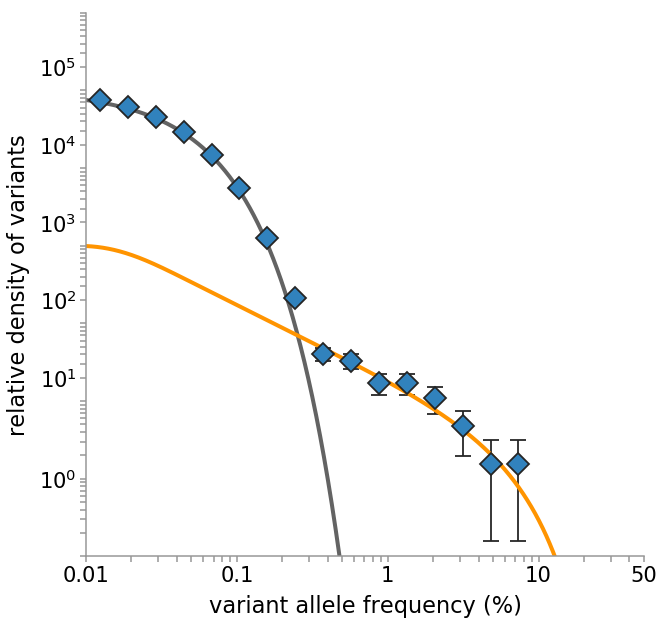

In [67]:
# Plot figure

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(10,10))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)

plot_fmin=0.01/100
plot_nbins = 20+10
plot_nbins = 20


#log binning : same bins and limits in the same simulation with same alpha


plot_log_hist_data_for_plot_rescaled_simulation_2(hitchhikers_syn_VAF_above_phi, number_of_individuals, u_neu, plot_nbins, np.log(plot_fmin), lmax, 'simulation', 'D', 15, blue4, 1.5, 0)


major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]


fmin=np.exp(lmin)
fmax=np.exp(lmax)

linear_VAF=np.array(np.linspace(plot_fmin, fmax, 1000))
log_VAF=np.array(np.linspace(np.log(plot_fmin), np.log(fmax), 1000))

density_neutral_drift_log=[np.log(Predicted_drift_with_cutoff(l, N_tau, c, t)) for l in log_VAF]
ax1.plot(log_VAF, density_neutral_drift_log, zorder=0, color=grey4, lw=4, label='neutral drift')

density_hitchhiker_all_drivers_log=[np.log(hitchhikers_reed_model_1(l, N_tau, t, u_ben, fitness)) for l in log_VAF]

ax1.plot(log_VAF, density_hitchhiker_all_drivers_log, zorder=0, color=c3, lw=4, label='alternative best-fit HH theory')
# ax1.plot(log_VAF, density_hitchhiker_all_drivers_true_values_log, zorder=0, color=c3, lw=4, linestyle=':',label='alternative best-fit HH theory')
ax1.set_ylim(None, None)
# ax1.axvline(x=log_phi, color=grey3, linestyle='--', linewidth=3)

# density_total=[np.log(np.exp(density_neutral_drift_log[i])+np.exp(density_hitchhiker_all_drivers_log[i])) for i in range(len(log_VAF))]
# # ax1.plot(log_VAF, density_total, zorder=1, color='gold', lw=4, label='')

print('t', t)
# plt.savefig('Reed_model_Simulation_validation_progression_with_age_s_10_percent_70_gen_uben_3times10minus6.pdf', bbox_inches='tight')


# Validation of developmental theory 

Simulations assume single s at 10%
data accounting for diploidy

In [44]:
# mirroring blood as much as possible

number_of_individuals=5000*4
N_tau=10**5
r=1.2
t_age=70
t_dev=np.log(N_tau)/r
n0=1
N=10**5


neutral_mutation=[]
neutral_mutation_hitchhiker=[]
neutral_mutation_beneficial_first=[]
neutral_mutation_beneficial_later=[]
neutral_mutation_not_hitchhiker=[]

mutation_dev=[]
neutral_mutation_dev=[]
beneficial_mutation_dev=[]

neutral_dev_and_hitchhiker_union=[]



for n in range(4):

    i=n+1
        

    vector_of_all_beneficial_mutation='validation of dev theory/beneficial_mutation_r_1p2_single_s_10p_70_gen_run_%s' % i
    vector_of_first_beneficial_mutation='validation of dev theory/beneficial_mutation_first_mutant_r_1p2_single_s_10p_70_gen_run_%s.csv'  % i
    vector_of_double_beneficial_mutants='validation of dev theory/beneficial_mutation_double_mutant_r_1p2_single_s_10p_70_gen_run_%s.csv' % i


    vector_of_neutral_mutation='validation of dev theory/neutral_mutation_r_1p2_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_hitchhiker='validation of dev theory/neutral_mutation_hitchhiker_r_1p2_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_beneficial_first='validation of dev theory/neutral_mutation_beneficial_first_r_1p2_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_beneficial_later='validation of dev theory/neutral_mutation_hitchhiker_beneficial_later_r_1p2_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_not_hitchhiker='validation of dev theory/neutral_mutation_not_hitchhiker_r_1p2_single_s_10p_70_gen_run_%s.csv' % i

    vector_of_mutation_dev = 'validation of dev theory/dev_mutation_r_1p2_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_dev='validation of dev theory/neutral_dev_mutation_r_1p2_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_beneficial_mutation_dev='validation of dev theory/beneficial_dev_mutation_r_1p2_single_s_10p_70_gen_run_%s.csv' % i

    vector_of_neutral_dev_and_hitchhiker_union='validation of dev theory/neutral_dev_hitchhiker_union_r_1p2_single_s_10p_70_gen_run_%s.csv' % i



    with open(vector_of_neutral_mutation) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
                neutral_mutation.append(clone_freq) 
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it

    with open(vector_of_neutral_mutation_hitchhiker) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_hitchhiker.append(clone_freq)     

    with open(vector_of_neutral_mutation_beneficial_first) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_beneficial_first.append(clone_freq)     

    with open(vector_of_neutral_mutation_beneficial_later) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_beneficial_later.append(clone_freq)     

    with open(vector_of_neutral_mutation_not_hitchhiker) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_not_hitchhiker.append(clone_freq)  

    with open(vector_of_mutation_dev) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            mutation_dev.append(clone_freq)  

    with open(vector_of_neutral_mutation_dev) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_dev.append(clone_freq)  

    with open(vector_of_beneficial_mutation_dev) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            beneficial_mutation_dev.append(clone_freq)  

    with open(vector_of_neutral_dev_and_hitchhiker_union) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_dev_and_hitchhiker_union.append(clone_freq)  
        

    
neutral_mutation=list(filter(lambda a: a != 0.0, neutral_mutation))
neutral_mutation_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_hitchhiker))
neutral_mutation_beneficial_first=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_first))
neutral_mutation_beneficial_later=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_later))
neutral_mutation_not_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_not_hitchhiker))
mutation_dev=list(filter(lambda a: a != 0.0, mutation_dev))
neutral_mutation_dev=list(filter(lambda a: a != 0.0, neutral_mutation_dev))
beneficial_mutation_dev=list(filter(lambda a: a != 0.0, beneficial_mutation_dev))
# hitchhikers_and_dev_neutral= neutral_mutation_dev+neutral_mutation_hitchhiker
neutral_dev_and_hitchhiker_union=neutral_dev_and_hitchhiker_union
            
lneutral_mutation=np.log(np.array(neutral_mutation))  
lneutral_mutation_hitchhiker=np.log(np.array(neutral_mutation_hitchhiker))  
lneutral_mutation_beneficial_first=np.log(np.array(neutral_mutation_beneficial_first))
lneutral_mutation_beneficial_later=np.log(np.array(neutral_mutation_beneficial_later))  
lneutral_mutation_not_hitchhiker=np.log(np.array(neutral_mutation_not_hitchhiker)) 
lmutation_dev=np.log(np.array(mutation_dev)) 
lneutral_mutation_dev=np.log(np.array(neutral_mutation_dev)) 
lbeneficial_mutation_dev=np.log(np.array(beneficial_mutation_dev)) 
lneutral_dev_and_hitchhiker_union=np.log(np.array(neutral_dev_and_hitchhiker_union))

# lneutral_mutation_hitchhiker_with_KD=[]
# lneutral_mutation_hitchhiker_with_UD=[]

# for i in range(len(lneutral_mutation_hitchhiker)):
#     if i < len(lneutral_mutation_hitchhiker)*0.75:
#         lneutral_mutation_hitchhiker_with_UD.append(lneutral_mutation_hitchhiker[i])
    
#     else:
#         lneutral_mutation_hitchhiker_with_KD.append(lneutral_mutation_hitchhiker[i])

    
# all_data=[neutral_mutation, neutral_mutation_hitchhiker,neutral_mutation_beneficial_first,neutral_mutation_beneficial_later,\
#          neutral_mutation_not_hitchhiker, mutation_dev, neutral_mutation_dev, beneficial_mutation_dev,\
#          neutral_dev_and_hitchhiker_union]
# all_log_data=[lneutral_mutation, lneutral_mutation_hitchhiker,lneutral_mutation_beneficial_first,\
#               lneutral_mutation_beneficial_later,lneutral_mutation_not_hitchhiker,\
#               lmutation_dev, lneutral_mutation_dev, lbeneficial_mutation_dev,\
#              lneutral_dev_and_hitchhiker_union,lneutral_mutation_hitchhiker_with_UD,\
#              lneutral_mutation_hitchhiker_with_KD]

ratio_ben_neu 0.1
add_contrib 17.60964047443682
beginning_size 105.65784284662091
hist without zero is [31207, 9178, 2355, 1123, 502, 163, 50]
log_hist_for_plot is [7.86745694 6.64362383 5.28335524 4.54281819 3.73765935 2.61280943
 1.43108224]
errors is [(0.005676832955028743, 0.01049306883497092, 0.02082179151175456, 0.030295073155714114, 0.04565886528799634, 0.08156374594800297, 0.15247699682656424), (0.0056447883489338935, 0.010384106699206086, 0.020397072881457312, 0.029404204499912545, 0.04366484668113246, 0.07540988037362428, 0.13227428950904452)]
hist without zero is [173487, 55757, 15597, 6596, 3346, 1697, 761, 361, 136, 61, 24]
log_hist_for_plot is [10.0349023   8.8998026   7.62587822  6.76526304  6.08656524  5.40766162
  4.60567771  3.85992231  2.88369924  2.08191822  1.14909819]
errors is [(0.0024037449978173697, 0.004243962517294975, 0.008039407255901132, 0.012389312399875507, 0.017438869630796106, 0.024574485415802094, 0.036923324719094985, 0.0540672212702753, 0.0896504481

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'contribution 17.61 times')

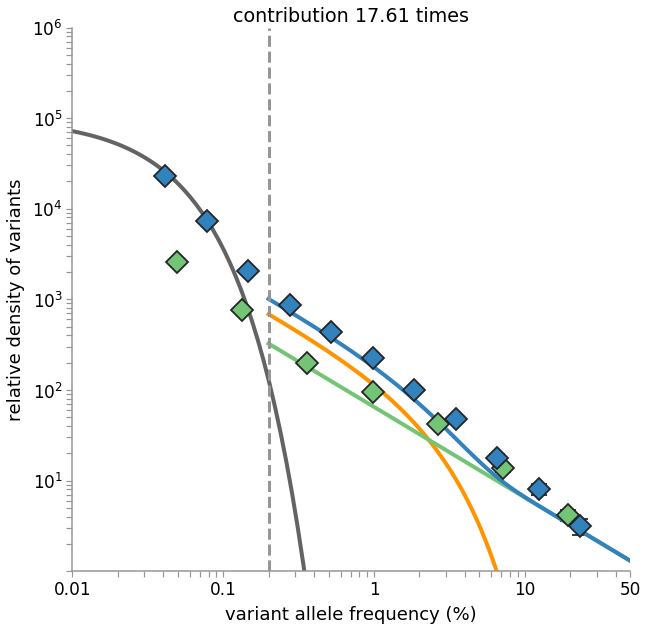

In [45]:
# Plotting figure

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(10,10))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)

#log binning : same bins and limits in the same simulation with same alpha
n_bins=11
n_bins_dev=7
fmin=0.2/100
fmax=0.32
lmin=np.log(fmin)
lmax=np.log(fmax)
fmin_drift=3*10**-4
lmin_drift=np.log(fmin_drift)
log_VAF_drift=np.array(np.linspace(np.log(fmin_drift), np.log(fmax), 1000))


major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]


# theory

u_neu = 0.0006
u_ben = 6e-05   # compare with lowered to 1e-05

ratio_ben_neu = u_ben/u_neu
print('ratio_ben_neu',ratio_ben_neu)

u_dev = 0.0002*3*r/np.log(2) # per generation
u_neu_dev = u_dev*(1-ratio_ben_neu)
u_ben_dev = u_dev*ratio_ben_neu



fitness_dev_sim=0.1


s=fitness_dev_sim
n_tilde=(np.exp(s*(t_age-t_dev))-1)/s
# add_contrib=u_dev/(u_neu+u_ben)*np.log(N)*s/r
# add_contrib=u_dev/(u_neu+u_ben)/r*s
add_contrib=u_ben_dev/(u_ben)*np.log(2*N)/r
print('add_contrib',add_contrib)
# u_ben = (add_contrib)*6e-05   # compare with lowered to 1e-05

beginning_size= N*np.log(2*N)/np.log(2)*u_ben_dev*np.log(2)/r
print('beginning_size', beginning_size)



plot_log_hist_data_for_plot_rescaled_simulation(neutral_mutation_dev, number_of_individuals, u_neu, n_bins_dev, lmin_drift,\
                                                lmax, 'dev. neutral', 'D', 15, green3, 1.2, 0)
plot_log_hist_data_for_plot_rescaled_simulation(neutral_mutation, number_of_individuals, u_neu, n_bins, lmin_drift,\
                                                lmax, 'all neutral', 'D', 15, blue4, 1.2, 0)
# plot_log_hist_data_for_plot_rescaled_simulation(neutral_dev_and_hitchhiker_union, number_of_individuals, u_neu, n_bins, lmin_drift,\
#                                                 lmax, 'neutral dev + HH', 'D', 15, grey4, 1.2, 0)

# plot_log_hist_data_for_plot_rescaled_simulation(beneficial_mutation_dev, number_of_individuals, u_neu, n_bins, lmin_drift,\
#                                                 lmax, 'dev. ben', 'D', 15, red4, 1.2, 0)

# plot_log_hist_data_for_plot_rescaled_simulation(beneficial_mutation, number_of_individuals, u_neu, n_bins, lmin_drift,\
#                                                 lmax, 'all ben', 'D', 15, red1, 1.2, 0)

linear_VAF=np.array(np.linspace(fmin, fmax, 100))
log_VAF=np.array(np.linspace(lmin, np.log(0.4999), 100))
log_VAF_drift=np.array(np.linspace(np.log(10**-4), np.log(0.4999), 100))

c=1
density_neutral_drift_log=[np.log(Predicted_drift_with_cutoff(l, N_tau, c, t_age-t_dev)) for l in log_VAF_drift]
ax1.plot(log_VAF_drift, density_neutral_drift_log, zorder=0, color=grey4, lw=4, label='neutral drift')

density_hitchhiker_all_drivers_log=[np.log(hitchhikers_reed_model_1(l, N_tau, t_age-t_dev, u_ben, fitness_dev_sim)) for l in log_VAF]

ax1.plot(log_VAF, density_hitchhiker_all_drivers_log, zorder=0, color=c3, lw=4, label='alternative best-fit HH theory')

print('u_ben', u_ben)


# neutral dev. mutations
def Predicted_neutral_dev_VAF_log(l, r, u_neu_dev, u_neu):
    density= u_neu_dev/r/(2*np.exp(l))/u_neu
    return np.log(density)

density_neutral_dev_log=[Predicted_neutral_dev_VAF_log(l, r, u_neu_dev, u_neu) for l in log_VAF]
ax1.plot(log_VAF, density_neutral_dev_log, zorder=0, color=green3, lw=4, label='developmental mutations')

density_dev_mut_AND_hitchhiker_log=[np.log(np.exp(density_hitchhiker_all_drivers_log[i])+np.exp(density_neutral_dev_log[i])) for i in range(len(log_VAF))]
ax1.plot(log_VAF, density_dev_mut_AND_hitchhiker_log, zorder=0, color=blue4, lw=4, label='all passengers and dev. mutations')

# beneficial_developmental_log=[beneficial_developmental_with_cutoff_log(l, N, u_ben_dev, u_neu, r, t_age-t_dev, fitness_dev_sim) for l in log_VAF]
# ax1.plot(log_VAF, beneficial_developmental_log, zorder=0, color=red4, lw=4, label='beneficial dev. mutations')

# beneficial_homeostasis_log=[np.log(Predicted_beneficial_with_cutoff(l, N_tau, u_ben, fitness_dev_sim, t_age-t_dev)/u_neu) for l in log_VAF]
# ax1.plot(log_VAF, beneficial_homeostasis_log, zorder=0, color=red4, lw=4, label='homeo. beneficial mutations')

ax1.axvline(x=lmin, color=grey3, linestyle='--', linewidth=3, zorder=0)
ax1.set_title('contribution '+ str(round(add_contrib,2))  +' times')
# ax1.legend()

In [42]:
# lower driver rate

number_of_individuals=500*10
N_tau=10**5
r=1.2
t_age=70
t_dev=np.log(N_tau)/r
n0=1
N=10**5


neutral_mutation=[]
neutral_mutation_hitchhiker=[]
neutral_mutation_beneficial_first=[]
neutral_mutation_beneficial_later=[]
neutral_mutation_not_hitchhiker=[]

mutation_dev=[]
neutral_mutation_dev=[]
beneficial_mutation_dev=[]

neutral_dev_and_hitchhiker_union=[]



for n in range(10):

    i=n+1
        

    vector_of_all_beneficial_mutation='validation of dev theory lower rate/beneficial_mutation_r_1p2_lower_uben_single_s_10p_70_gen_run_%s' % i
    vector_of_first_beneficial_mutation='validation of dev theory lower rate/beneficial_mutation_first_mutant_r_1p2_lower_uben_single_s_10p_70_gen_run_%s.csv'  % i
    vector_of_double_beneficial_mutants='validation of dev theory lower rate/beneficial_mutation_double_mutant_r_1p2_lower_uben_single_s_10p_70_gen_run_%s.csv' % i


    vector_of_neutral_mutation='validation of dev theory lower rate/neutral_mutation_r_1p2_lower_uben_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_hitchhiker='validation of dev theory lower rate/neutral_mutation_hitchhiker_r_1p2_lower_uben_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_beneficial_first='validation of dev theory lower rate/neutral_mutation_beneficial_first_r_1p2_lower_uben_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_beneficial_later='validation of dev theory lower rate/neutral_mutation_hitchhiker_beneficial_later_r_1p2_lower_uben_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_not_hitchhiker='validation of dev theory lower rate/neutral_mutation_not_hitchhiker_r_1p2_lower_uben_single_s_10p_70_gen_run_%s.csv' % i

    vector_of_mutation_dev = 'validation of dev theory lower rate/dev_mutation_r_1p2_lower_uben_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_dev='validation of dev theory lower rate/neutral_dev_mutation_r_1p2_lower_uben_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_beneficial_mutation_dev='validation of dev theory lower rate/beneficial_dev_mutation_r_1p2_lower_uben_single_s_10p_70_gen_run_%s.csv' % i

    vector_of_neutral_dev_and_hitchhiker_union='validation of dev theory lower rate/neutral_dev_hitchhiker_union_r_1p2_lower_uben_single_s_10p_70_gen_run_%s.csv' % i



    with open(vector_of_neutral_mutation) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
                neutral_mutation.append(clone_freq) 
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it

    with open(vector_of_neutral_mutation_hitchhiker) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_hitchhiker.append(clone_freq)     

    with open(vector_of_neutral_mutation_beneficial_first) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_beneficial_first.append(clone_freq)     

    with open(vector_of_neutral_mutation_beneficial_later) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_beneficial_later.append(clone_freq)     

    with open(vector_of_neutral_mutation_not_hitchhiker) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_not_hitchhiker.append(clone_freq)  

    with open(vector_of_mutation_dev) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            mutation_dev.append(clone_freq)  

    with open(vector_of_neutral_mutation_dev) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_dev.append(clone_freq)  

    with open(vector_of_beneficial_mutation_dev) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            beneficial_mutation_dev.append(clone_freq)  

    with open(vector_of_neutral_dev_and_hitchhiker_union) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_dev_and_hitchhiker_union.append(clone_freq)  
        

    
neutral_mutation=list(filter(lambda a: a != 0.0, neutral_mutation))
neutral_mutation_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_hitchhiker))
neutral_mutation_beneficial_first=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_first))
neutral_mutation_beneficial_later=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_later))
neutral_mutation_not_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_not_hitchhiker))
mutation_dev=list(filter(lambda a: a != 0.0, mutation_dev))
neutral_mutation_dev=list(filter(lambda a: a != 0.0, neutral_mutation_dev))
beneficial_mutation_dev=list(filter(lambda a: a != 0.0, beneficial_mutation_dev))
# hitchhikers_and_dev_neutral= neutral_mutation_dev+neutral_mutation_hitchhiker
neutral_dev_and_hitchhiker_union=neutral_dev_and_hitchhiker_union
            
lneutral_mutation=np.log(np.array(neutral_mutation))  
lneutral_mutation_hitchhiker=np.log(np.array(neutral_mutation_hitchhiker))  
lneutral_mutation_beneficial_first=np.log(np.array(neutral_mutation_beneficial_first))
lneutral_mutation_beneficial_later=np.log(np.array(neutral_mutation_beneficial_later))  
lneutral_mutation_not_hitchhiker=np.log(np.array(neutral_mutation_not_hitchhiker)) 
lmutation_dev=np.log(np.array(mutation_dev)) 
lneutral_mutation_dev=np.log(np.array(neutral_mutation_dev)) 
lbeneficial_mutation_dev=np.log(np.array(beneficial_mutation_dev)) 
lneutral_dev_and_hitchhiker_union=np.log(np.array(neutral_dev_and_hitchhiker_union))

# lneutral_mutation_hitchhiker_with_KD=[]
# lneutral_mutation_hitchhiker_with_UD=[]

# for i in range(len(lneutral_mutation_hitchhiker)):
#     if i < len(lneutral_mutation_hitchhiker)*0.75:
#         lneutral_mutation_hitchhiker_with_UD.append(lneutral_mutation_hitchhiker[i])
    
#     else:
#         lneutral_mutation_hitchhiker_with_KD.append(lneutral_mutation_hitchhiker[i])

    
# all_data=[neutral_mutation, neutral_mutation_hitchhiker,neutral_mutation_beneficial_first,neutral_mutation_beneficial_later,\
#          neutral_mutation_not_hitchhiker, mutation_dev, neutral_mutation_dev, beneficial_mutation_dev,\
#          neutral_dev_and_hitchhiker_union]
# all_log_data=[lneutral_mutation, lneutral_mutation_hitchhiker,lneutral_mutation_beneficial_first,\
#               lneutral_mutation_beneficial_later,lneutral_mutation_not_hitchhiker,\
#               lmutation_dev, lneutral_mutation_dev, lbeneficial_mutation_dev,\
#              lneutral_dev_and_hitchhiker_union,lneutral_mutation_hitchhiker_with_UD,\
#              lneutral_mutation_hitchhiker_with_KD]

ratio_ben_neu 0.01666666666666667
add_contrib 17.60964047443682
beginning_size 17.60964047443682
hist without zero is [10584, 3727, 740, 277, 112, 36, 10]
log_hist_for_plot is [8.1724523  7.12871249 5.51200378 4.5293711  3.62385246 2.48887253
 1.20793869]
errors is [(0.009767746888551088, 0.01651588102178181, 0.03745343605668072, 0.06196495752856013, 0.09925819304007799, 0.18232155679395445, 0.3801304080661716), (0.009673260187483379, 0.016247532704057654, 0.03610117080666697, 0.05834831705837207, 0.0902895230573173, 0.1541506798272585, 0.27476989240834526)]
hist without zero is [55655, 19318, 3840, 903, 434, 239, 116, 61, 22, 12, 4]
log_hist_for_plot is [10.28426592  9.2261313   7.61056636  6.16306127  5.43038325  4.83380227
  4.11092891  3.46821258  2.44838117  1.84224537  0.74363308]
errors is [(0.0042478580012232925, 0.007220810616944462, 0.016269056937233017, 0.03384422533471554, 0.04919185771490042, 0.06687150467957892, 0.09744489268078649, 0.13700814946857998, 0.2397821029348699

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log


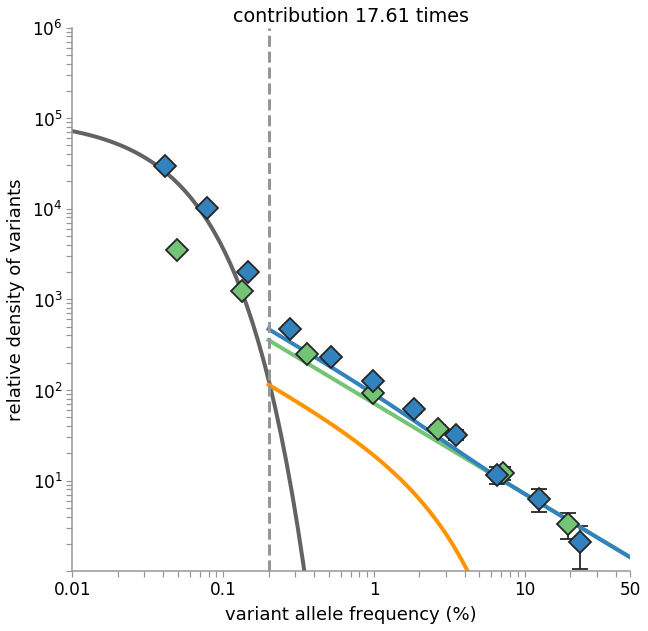

In [43]:
# Plotting figure

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(10,10))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)

#log binning : same bins and limits in the same simulation with same alpha
n_bins=11
n_bins_dev=7
fmin=0.2/100
fmax=0.32
lmin=np.log(fmin)
lmax=np.log(fmax)
fmin_drift=3*10**-4
lmin_drift=np.log(fmin_drift)
log_VAF_drift=np.array(np.linspace(np.log(fmin_drift), np.log(fmax), 1000))


major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]


# theory

u_neu = 0.0006
u_ben = 1e-05   # compare with lowered to 1e-05
ratio_ben_neu = u_ben/u_neu
print('ratio_ben_neu',ratio_ben_neu)

u_dev = 0.0002*3*r/np.log(2) # per generation
u_neu_dev = u_dev*(1-ratio_ben_neu)
u_ben_dev = u_dev*ratio_ben_neu

fitness_dev_sim=0.1


s=fitness_dev_sim
n_tilde=(np.exp(s*(t_age-t_dev))-1)/s
add_contrib=u_ben_dev/(u_ben)*np.log(2*N)/r
# add_contrib=u_dev/(u_neu+u_ben)/r*s
# add_contrib=0
print('add_contrib',add_contrib)
# u_ben = (add_contrib)*1e-05   # compare with lowered to 1e-05


beginning_size= N*np.log(2*N)/np.log(2)*u_ben_dev*np.log(2)/r
print('beginning_size',beginning_size)


plot_log_hist_data_for_plot_rescaled_simulation(neutral_mutation_dev, number_of_individuals, u_neu, n_bins_dev, lmin_drift,\
                                                lmax, 'dev. neutral', 'D', 15, green3, 1.2, 0)
plot_log_hist_data_for_plot_rescaled_simulation(neutral_mutation, number_of_individuals, u_neu, n_bins, lmin_drift,\
                                                lmax, 'all neutral', 'D', 15, blue4, 1.2, 0)
# plot_log_hist_data_for_plot_rescaled_simulation(neutral_dev_and_hitchhiker_union, number_of_individuals, u_neu, n_bins, lmin_drift,\
#                                                 lmax, 'neutral dev + HH', 'D', 15, grey4, 1.2, 0)

# plot_log_hist_data_for_plot_rescaled_simulation(beneficial_mutation_dev, number_of_individuals, u_neu, n_bins, lmin_drift,\
#                                                 lmax, 'dev. ben', 'D', 15, red4, 1.2, 0)

# plot_log_hist_data_for_plot_rescaled_simulation(beneficial_mutation, number_of_individuals, u_neu, n_bins, lmin_drift,\
#                                                 lmax, 'all ben', 'D', 15, red1, 1.2, 0)

linear_VAF=np.array(np.linspace(fmin, fmax, 100))
log_VAF=np.array(np.linspace(lmin, np.log(0.4999), 100))
log_VAF_drift=np.array(np.linspace(np.log(10**-4), np.log(0.4999), 100))

c=1
density_neutral_drift_log=[np.log(Predicted_drift_with_cutoff(l, N_tau, c, t_age-t_dev)) for l in log_VAF_drift]
ax1.plot(log_VAF_drift, density_neutral_drift_log, zorder=0, color=grey4, lw=4, label='neutral drift')

density_hitchhiker_all_drivers_log=[np.log(hitchhikers_reed_model_1(l, N_tau, t_age-t_dev, u_ben, fitness_dev_sim)) for l in log_VAF]

ax1.plot(log_VAF, density_hitchhiker_all_drivers_log, zorder=0, color=c3, lw=4, label='alternative best-fit HH theory')

print('u_ben', u_ben)

# neutral dev. mutations
def Predicted_neutral_dev_VAF_log(l, r, u_neu_dev, u_neu):
    density= u_neu_dev/r/(2*np.exp(l))/u_neu
    return np.log(density)

density_neutral_dev_log=[Predicted_neutral_dev_VAF_log(l, r, u_neu_dev, u_neu) for l in log_VAF]
ax1.plot(log_VAF, density_neutral_dev_log, zorder=0, color=green3, lw=4, label='developmental mutations')

density_dev_mut_AND_hitchhiker_log=[np.log(np.exp(density_hitchhiker_all_drivers_log[i])+np.exp(density_neutral_dev_log[i])) for i in range(len(log_VAF))]
ax1.plot(log_VAF, density_dev_mut_AND_hitchhiker_log, zorder=0, color=blue4, lw=4, label='all passengers and dev. mutations')

# beneficial_developmental_log=[beneficial_developmental_with_cutoff_log(l, N, u_ben_dev, u_neu, r, t_age-t_dev, fitness_dev_sim) for l in log_VAF]
# ax1.plot(log_VAF, beneficial_developmental_log, zorder=0, color=red4, lw=4, label='beneficial dev. mutations')

# beneficial_homeostasis_log=[np.log(Predicted_beneficial_with_cutoff(l, N_tau, u_ben, fitness_dev_sim, t_age-t_dev)/u_neu) for l in log_VAF]
# ax1.plot(log_VAF, beneficial_homeostasis_log, zorder=0, color=red4, lw=4, label='homeo. beneficial mutations')
ax1.set_title('contribution '+ str(round(add_contrib,2))  +' times')
ax1.axvline(x=lmin, color=grey3, linestyle='--', linewidth=3, zorder=0)
# plt.savefig('dev_plot_2.pdf', bbox_inches='tight')


In [46]:
# lower u_ben and u_dev
number_of_individuals=1000*10
N_tau=10**5
r=1.2
t_age=70
t_dev=np.log(N_tau)/r
n0=1
N=10**5

# beneficial_mutation=[]
neutral_mutation=[]
neutral_mutation_hitchhiker=[]
neutral_mutation_beneficial_first=[]
neutral_mutation_beneficial_later=[]
neutral_mutation_not_hitchhiker=[]

mutation_dev=[]
neutral_mutation_dev=[]
beneficial_mutation_dev=[]

neutral_dev_and_hitchhiker_union=[]



for n in range(10):

    i=n+1
        

    vector_of_all_beneficial_mutation='validation of drift theory lower uben lower dev rate/beneficial_mutation_r_1p2_lower_dev_rate_uben_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_first_beneficial_mutation='validation of drift theory lower uben lower dev rate/beneficial_mutation_first_mutant_r_1p2_lower_dev_rate_uben_single_s_10p_70_gen_run_%s.csv'  % i
    vector_of_double_beneficial_mutants='validation of drift theory lower uben lower dev rate/beneficial_mutation_double_mutant_r_1p2_lower_dev_rate_uben_single_s_10p_70_gen_run_%s.csv' % i


    vector_of_neutral_mutation='validation of drift theory lower uben lower dev rate/neutral_mutation_r_1p2_lower_dev_rate_uben_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_hitchhiker='validation of drift theory lower uben lower dev rate/neutral_mutation_hitchhiker_r_1p2_lower_dev_rate_uben_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_beneficial_first='validation of drift theory lower uben lower dev rate/neutral_mutation_beneficial_first_r_1p2_lower_dev_rate_uben_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_beneficial_later='validation of drift theory lower uben lower dev rate/neutral_mutation_hitchhiker_beneficial_later_r_1p2_lower_dev_rate_uben_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_not_hitchhiker='validation of drift theory lower uben lower dev rate/neutral_mutation_not_hitchhiker_r_1p2_lower_dev_rate_uben_single_s_10p_70_gen_run_%s.csv' % i

    vector_of_mutation_dev = 'validation of drift theory lower uben lower dev rate/dev_mutation_r_1p2_lower_dev_rate_uben_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_neutral_mutation_dev='validation of drift theory lower uben lower dev rate/neutral_dev_mutation_r_1p2_lower_dev_rate_uben_single_s_10p_70_gen_run_%s.csv' % i
    vector_of_beneficial_mutation_dev='validation of drift theory lower uben lower dev rate/beneficial_dev_mutation_r_1p2_lower_dev_rate_uben_single_s_10p_70_gen_run_%s.csv' % i

    vector_of_neutral_dev_and_hitchhiker_union='validation of drift theory lower uben lower dev rate/neutral_dev_hitchhiker_union_r_1p2_lower_dev_rate_uben_single_s_10p_70_gen_run_%s.csv' % i

    with open(vector_of_all_beneficial_mutation) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
                beneficial_mutation.append(clone_freq) 
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it

    with open(vector_of_neutral_mutation) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
                neutral_mutation.append(clone_freq) 
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it

    with open(vector_of_neutral_mutation_hitchhiker) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_hitchhiker.append(clone_freq)     

    with open(vector_of_neutral_mutation_beneficial_first) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_beneficial_first.append(clone_freq)     

    with open(vector_of_neutral_mutation_beneficial_later) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_beneficial_later.append(clone_freq)     

    with open(vector_of_neutral_mutation_not_hitchhiker) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_not_hitchhiker.append(clone_freq)  

    with open(vector_of_mutation_dev) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            mutation_dev.append(clone_freq)  

    with open(vector_of_neutral_mutation_dev) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_mutation_dev.append(clone_freq)  

    with open(vector_of_beneficial_mutation_dev) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            beneficial_mutation_dev.append(clone_freq)  

    with open(vector_of_neutral_dev_and_hitchhiker_union) as data:
        reader = csv.reader(data,delimiter=',')
        next(reader, None)   #skips header
        for row in reader:
            try:            
                clone_freq= float(row[1])
            except: # catch the error    
            #except IndexError: # catch the error
                    pass # pass will basically ignore it
             # and execution will continue on to whatever comes
             # after the try/except block
            #print((row[1]))
            neutral_dev_and_hitchhiker_union.append(clone_freq)  
        

# beneficial_mutation=list(filter(lambda a: a != 0.0, beneficial_mutation))
neutral_mutation=list(filter(lambda a: a != 0.0, neutral_mutation))
neutral_mutation_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_hitchhiker))
neutral_mutation_beneficial_first=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_first))
neutral_mutation_beneficial_later=list(filter(lambda a: a != 0.0, neutral_mutation_beneficial_later))
neutral_mutation_not_hitchhiker=list(filter(lambda a: a != 0.0, neutral_mutation_not_hitchhiker))
mutation_dev=list(filter(lambda a: a != 0.0, mutation_dev))
neutral_mutation_dev=list(filter(lambda a: a != 0.0, neutral_mutation_dev))
beneficial_mutation_dev=list(filter(lambda a: a != 0.0, beneficial_mutation_dev))
# hitchhikers_and_dev_neutral= neutral_mutation_dev+neutral_mutation_hitchhiker
neutral_dev_and_hitchhiker_union=neutral_dev_and_hitchhiker_union
            
# lbeneficial_mutation=np.log(np.array(beneficial_mutation))  
lneutral_mutation=np.log(np.array(neutral_mutation))  
lneutral_mutation_hitchhiker=np.log(np.array(neutral_mutation_hitchhiker))  
lneutral_mutation_beneficial_first=np.log(np.array(neutral_mutation_beneficial_first))
lneutral_mutation_beneficial_later=np.log(np.array(neutral_mutation_beneficial_later))  
lneutral_mutation_not_hitchhiker=np.log(np.array(neutral_mutation_not_hitchhiker)) 
lmutation_dev=np.log(np.array(mutation_dev)) 
lneutral_mutation_dev=np.log(np.array(neutral_mutation_dev)) 
lbeneficial_mutation_dev=np.log(np.array(beneficial_mutation_dev)) 
lneutral_dev_and_hitchhiker_union=np.log(np.array(neutral_dev_and_hitchhiker_union))

# lneutral_mutation_hitchhiker_with_KD=[]
# lneutral_mutation_hitchhiker_with_UD=[]

# for i in range(len(lneutral_mutation_hitchhiker)):
#     if i < len(lneutral_mutation_hitchhiker)*0.75:
#         lneutral_mutation_hitchhiker_with_UD.append(lneutral_mutation_hitchhiker[i])
    
#     else:
#         lneutral_mutation_hitchhiker_with_KD.append(lneutral_mutation_hitchhiker[i])

    
# all_data=[neutral_mutation, neutral_mutation_hitchhiker,neutral_mutation_beneficial_first,neutral_mutation_beneficial_later,\
#          neutral_mutation_not_hitchhiker, mutation_dev, neutral_mutation_dev, beneficial_mutation_dev,\
#          neutral_dev_and_hitchhiker_union]
# all_log_data=[lneutral_mutation, lneutral_mutation_hitchhiker,lneutral_mutation_beneficial_first,\
#               lneutral_mutation_beneficial_later,lneutral_mutation_not_hitchhiker,\
#               lmutation_dev, lneutral_mutation_dev, lbeneficial_mutation_dev,\
#              lneutral_dev_and_hitchhiker_union,lneutral_mutation_hitchhiker_with_UD,\
#              lneutral_mutation_hitchhiker_with_KD]

ratio_ben_neu 0.01666666666666667
u_dev 0.00010387404294400538
u_neu_dev 0.00010214280889493862
u_ben_dev 1.7312340490667568e-06
add_contrib 1.7609640474436816
u_ben 1e-05
beginning_size 1.760964047443682
hist without zero is [958, 865, 563, 306, 144, 66, 50, 24, 14, 13, 6, 3, 3, 2, 1]
log_hist_for_plot is [ 5.90373276  5.80161449  5.37216461  4.76247009  4.00869829  3.22853973
  2.95090799  2.21693882  1.67794232  1.60383434  0.83064446  0.13749727
  0.13749727 -0.26796783 -0.96111501]
errors is [(0.03284197545339662, 0.034592500718315655, 0.0430588435653938, 0.05886525265238607, 0.08701137698962969, 0.131352614719368, 0.15247699682656402, 0.2283120666476368, 0.31096604159333574, 0.3248304038551144, 0.5246681416422596, 0.8612115025164904, 0.8612115025164904, 1.2279471772995156, 2.302585092994046), (0.031797588935489784, 0.03343576259049197, 0.04128106531939402, 0.055591927307417244, 0.08004270767353638, 0.11608514258858005, 0.13227428950904452, 0.1857524522288414, 0.23685806943961407,

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in log


u_ben 1e-05


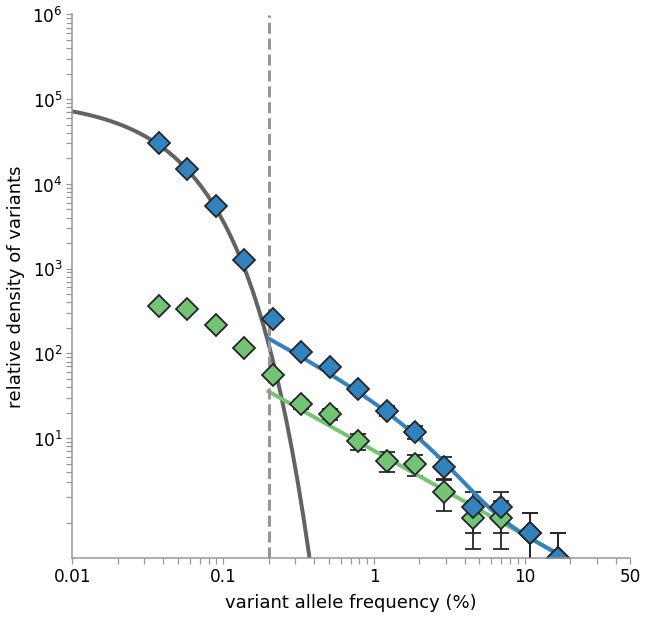

In [50]:
# Plotting figure

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(10,10))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)

#log binning : same bins and limits in the same simulation with same alpha
n_bins=16
n_bins_dev=16
fmin=0.2/100
fmax=0.32
lmin=np.log(fmin)
lmax=np.log(fmax)
fmin_drift=3*10**-4
lmin_drift=np.log(fmin_drift)
log_VAF_drift=np.array(np.linspace(np.log(fmin_drift), np.log(fmax), 1000))


major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]


# theory

u_neu = 0.0006
u_ben = 1e-05   
ratio_ben_neu = u_ben/u_neu
print('ratio_ben_neu', ratio_ben_neu)

u_dev = 0.0002*3*r/np.log(2)/10 # per generation, lowered by 1/10
u_neu_dev = u_dev*(1-ratio_ben_neu)
u_ben_dev = u_dev*ratio_ben_neu
print('u_dev',u_dev)
print('u_neu_dev',u_neu_dev)
print('u_ben_dev',u_ben_dev)

fitness_dev_sim=0.1

s=fitness_dev_sim
n_tilde=(np.exp(s*(t_age-t_dev))-1)/s
add_contrib=u_ben_dev/(u_ben)*np.log(2*N)/r
# add_contrib=u_dev/(u_neu+u_ben)/r*s
# add_contrib=0
print('add_contrib',add_contrib)
# u_ben = (add_contrib)*1e-05   # compare with lowered to 1e-05

print('u_ben',u_ben)

beginning_size= N*np.log(2*N)/np.log(2)*u_ben_dev*np.log(2)/r
print('beginning_size',beginning_size)


plot_log_hist_data_for_plot_rescaled_simulation(neutral_mutation_dev, number_of_individuals, u_neu, n_bins_dev, lmin_drift,\
                                                lmax, 'dev. neutral', 'D', 15, green3, 1.2, 0)
plot_log_hist_data_for_plot_rescaled_simulation(neutral_mutation, number_of_individuals, u_neu, n_bins, lmin_drift,\
                                                lmax, 'all neutral', 'D', 15, blue4, 1.2, 0)
# plot_log_hist_data_for_plot_rescaled_simulation(neutral_dev_and_hitchhiker_union, number_of_individuals, u_neu, n_bins, lmin_drift,\
#                                                 lmax, 'neutral dev + HH', 'D', 15, grey4, 1.2, 0)

# plot_log_hist_data_for_plot_rescaled_simulation(beneficial_mutation_dev, number_of_individuals, u_neu, n_bins, lmin_drift,\
#                                                 lmax, 'dev. ben', 'D', 15, red4, 1.2, 0)

# plot_log_hist_data_for_plot_rescaled_simulation(beneficial_mutation, number_of_individuals, u_neu, n_bins, lmin_drift,\
#                                                 lmax, 'all ben', 'D', 15, red1, 1.2, 0)

linear_VAF=np.array(np.linspace(fmin, fmax, 100))
log_VAF=np.array(np.linspace(lmin, np.log(0.4999), 100))
log_VAF_drift=np.array(np.linspace(np.log(10**-4), np.log(0.4999), 100))

c=1
density_neutral_drift_log=[np.log(Predicted_drift_with_cutoff(l, N_tau, c, t_age-t_dev)) for l in log_VAF_drift]
ax1.plot(log_VAF_drift, density_neutral_drift_log, zorder=0, color=grey4, lw=4, label='neutral drift')

density_hitchhiker_all_drivers_log=[np.log(hitchhikers_reed_model_1(l, N_tau, t_age-t_dev, u_ben, fitness_dev_sim)) for l in log_VAF]

# ax1.plot(log_VAF, density_hitchhiker_all_drivers_log, zorder=0, color=c3, lw=4, label='alternative best-fit HH theory')

print('u_ben', u_ben)

# neutral dev. mutations
def Predicted_neutral_dev_VAF_log(l, r, u_neu_dev, u_neu):
    density= u_neu_dev/r/(2*np.exp(l))/u_neu
    return np.log(density)

density_neutral_dev_log=[Predicted_neutral_dev_VAF_log(l, r, u_neu_dev, u_neu) for l in log_VAF]
ax1.plot(log_VAF, density_neutral_dev_log, zorder=0, color=green3, lw=4, label='developmental mutations')

density_dev_mut_AND_hitchhiker_log=[np.log(np.exp(density_hitchhiker_all_drivers_log[i])+np.exp(density_neutral_dev_log[i])) for i in range(len(log_VAF))]
ax1.plot(log_VAF, density_dev_mut_AND_hitchhiker_log, zorder=0, color=blue4, lw=4, label='all passengers and dev. mutations')

# beneficial_developmental_log=[beneficial_developmental_with_cutoff_log(l, N, u_ben_dev, u_neu, r, t_age-t_dev, fitness_dev_sim) for l in log_VAF]
# ax1.plot(log_VAF, beneficial_developmental_log, zorder=0, color=red4, lw=4, label='beneficial dev. mutations')

# beneficial_homeostasis_log=[np.log(Predicted_beneficial_with_cutoff(l, N_tau, u_ben, fitness_dev_sim, t_age-t_dev)/u_neu) for l in log_VAF]
# ax1.plot(log_VAF, beneficial_homeostasis_log, zorder=0, color=red4, lw=4, label='homeo. beneficial mutations')

ax1.axvline(x=lmin, color=grey3, linestyle='--', linewidth=3, zorder=0)
# ax1.set_title('contribution '+ str(round(add_contrib,2))  +' times')
# ax1.legend()
# plt.savefig('supp_fig_validation_of_dev_theory.pdf', bbox_inches='tight')
# plt.savefig('my_own_check_validation_of_dev_theory_low_u_ben_all_dev_ben_mutants.pdf', bbox_inches='tight')
# plt.savefig('dev_plot_3.pdf', bbox_inches='tight')